In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import plotly.express as px


# Timeseries Analysis

In [2]:
df = pd.read_csv('Copy of Cleaned_DataCo_Product_Recategorized_with_classes.csv')
df.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name_new,customer_city,...,shipping_month,shipping_day,price_bin,class,Quarter,Year,cost_per_order,order_date,marginal_profit_per_order,profit_margin_per_order
0,debit,3,4,91.250000,314.640015,advance shipping,0,73,electronics & gadgets,caguas,...,2,3,Very_High,C,2018Q1,2018,223.390015,2018-01-31,0.290014,0.290014
1,transfer,5,4,-249.089996,311.359985,late delivery,1,73,electronics & gadgets,caguas,...,1,18,Very_High,C,2018Q1,2018,560.449982,2018-01-13,-0.800006,-0.800006
2,cash,4,4,-247.779999,309.720001,shipping on time,0,73,electronics & gadgets,san jose,...,1,17,Very_High,C,2018Q1,2018,557.500000,2018-01-13,-0.800013,-0.800013
3,debit,3,4,22.860001,304.809998,advance shipping,0,73,electronics & gadgets,los angeles,...,1,16,Very_High,C,2018Q1,2018,281.949997,2018-01-13,0.074998,0.074998
4,payment,2,4,134.210007,298.250000,advance shipping,0,73,electronics & gadgets,caguas,...,1,15,Very_High,C,2018Q1,2018,164.039993,2018-01-13,0.449992,0.449992


In [3]:
df.columns.unique

<bound method Index.unique of Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name_new',
       'customer_city', 'customer_country', 'customer_segment',
       'customer_state', 'department_name', 'market', 'order_city',
       'order_country', 'order_customer_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_name', 'product_price',
       'year_month', 'year', 'shipping_mode', 'order_year', 'order_month',
       'order_day', 'shipping_year', 'shipping_month', 'shipping_day',
       'price_bin', 'class', 'Quarter', 'Year', 'cost_per_order', 'order_date',
       'marginal_profit_per_order', 'profit_margin_per_order'],
     

In [4]:
# Define the edges of the bins
bin_edges = [-float('inf'), 109.49, 208.98, 308.48, 407.98, float('inf')]
# Define the labels for the bins
bin_labels = ['Low', 'Medium', 'High', 'Very_High', 'Super_High']

# Use pd.cut to create the price_bin column
df['price_bin'] = pd.cut(df['product_price'], bins=bin_edges, labels=bin_labels)

In [5]:
df.to_csv('Copy of Cleaned_DataCo_Product_Recategorized_with_classes.csv', index=False)

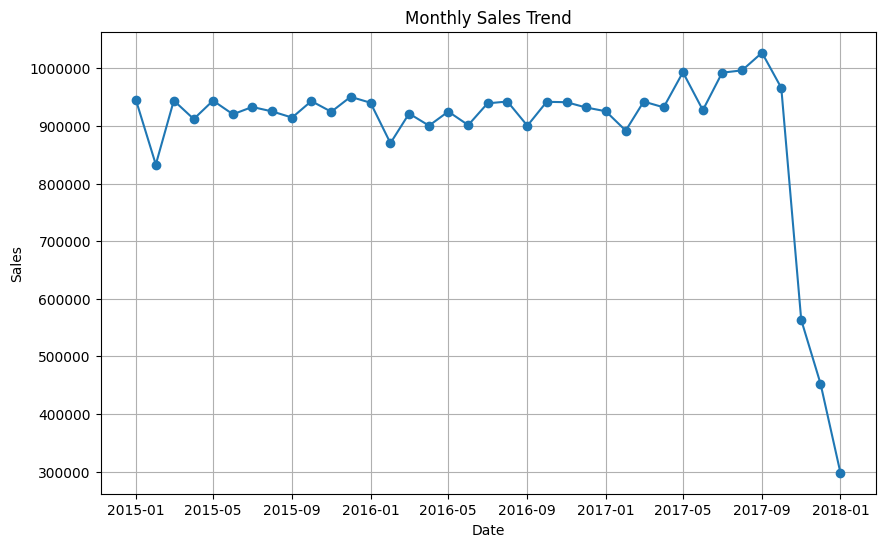

In [6]:
df['year_month'] = pd.to_datetime(df['year_month'])

# Trend analysis of sales over time
df_time_series = df.groupby('year_month')['order_item_total'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_time_series['year_month'], df_time_series['order_item_total'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')

# Set y-axis numbers to display in the usual format
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.show()

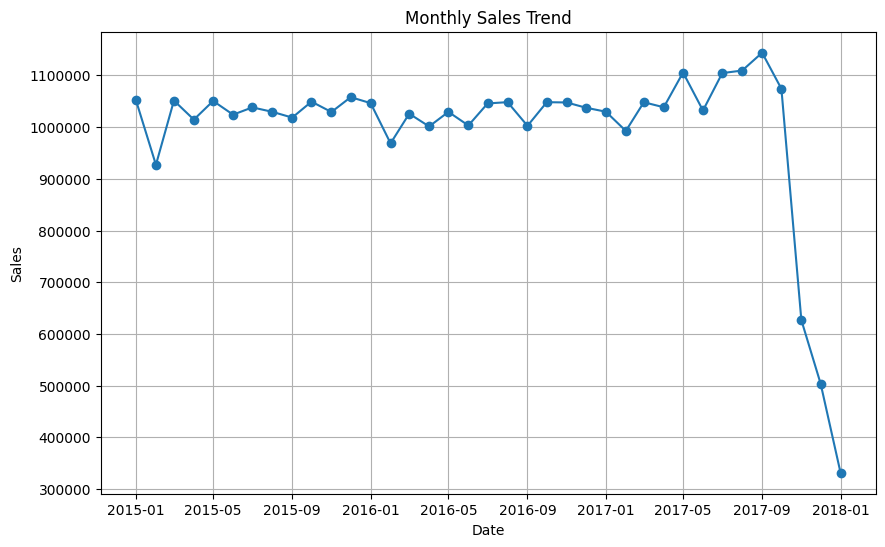

In [7]:
df['year_month'] = pd.to_datetime(df['year_month'])

# Trend analysis of sales over time
df_time_series = df.groupby('year_month')['sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_time_series['year_month'], df_time_series['sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')

# Set y-axis numbers to display in the usual format
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.show()

In [8]:
# To display as float in two decimal places without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [9]:
# Extract the year from the 'year_month' column
df['year'] = df['year_month'].dt.year

# Trend analysis of sales over time on a yearly basis
df_yearly_series = df.groupby('year')['sales'].sum().reset_index()

# Displaying the yearly sales trend in a table
df_yearly_series

,year,sales
0,2015,12340831.43
1,2016,12303817.32
2,2017,11808436.14
3,2018,331650.12


# Handeling the Outlier


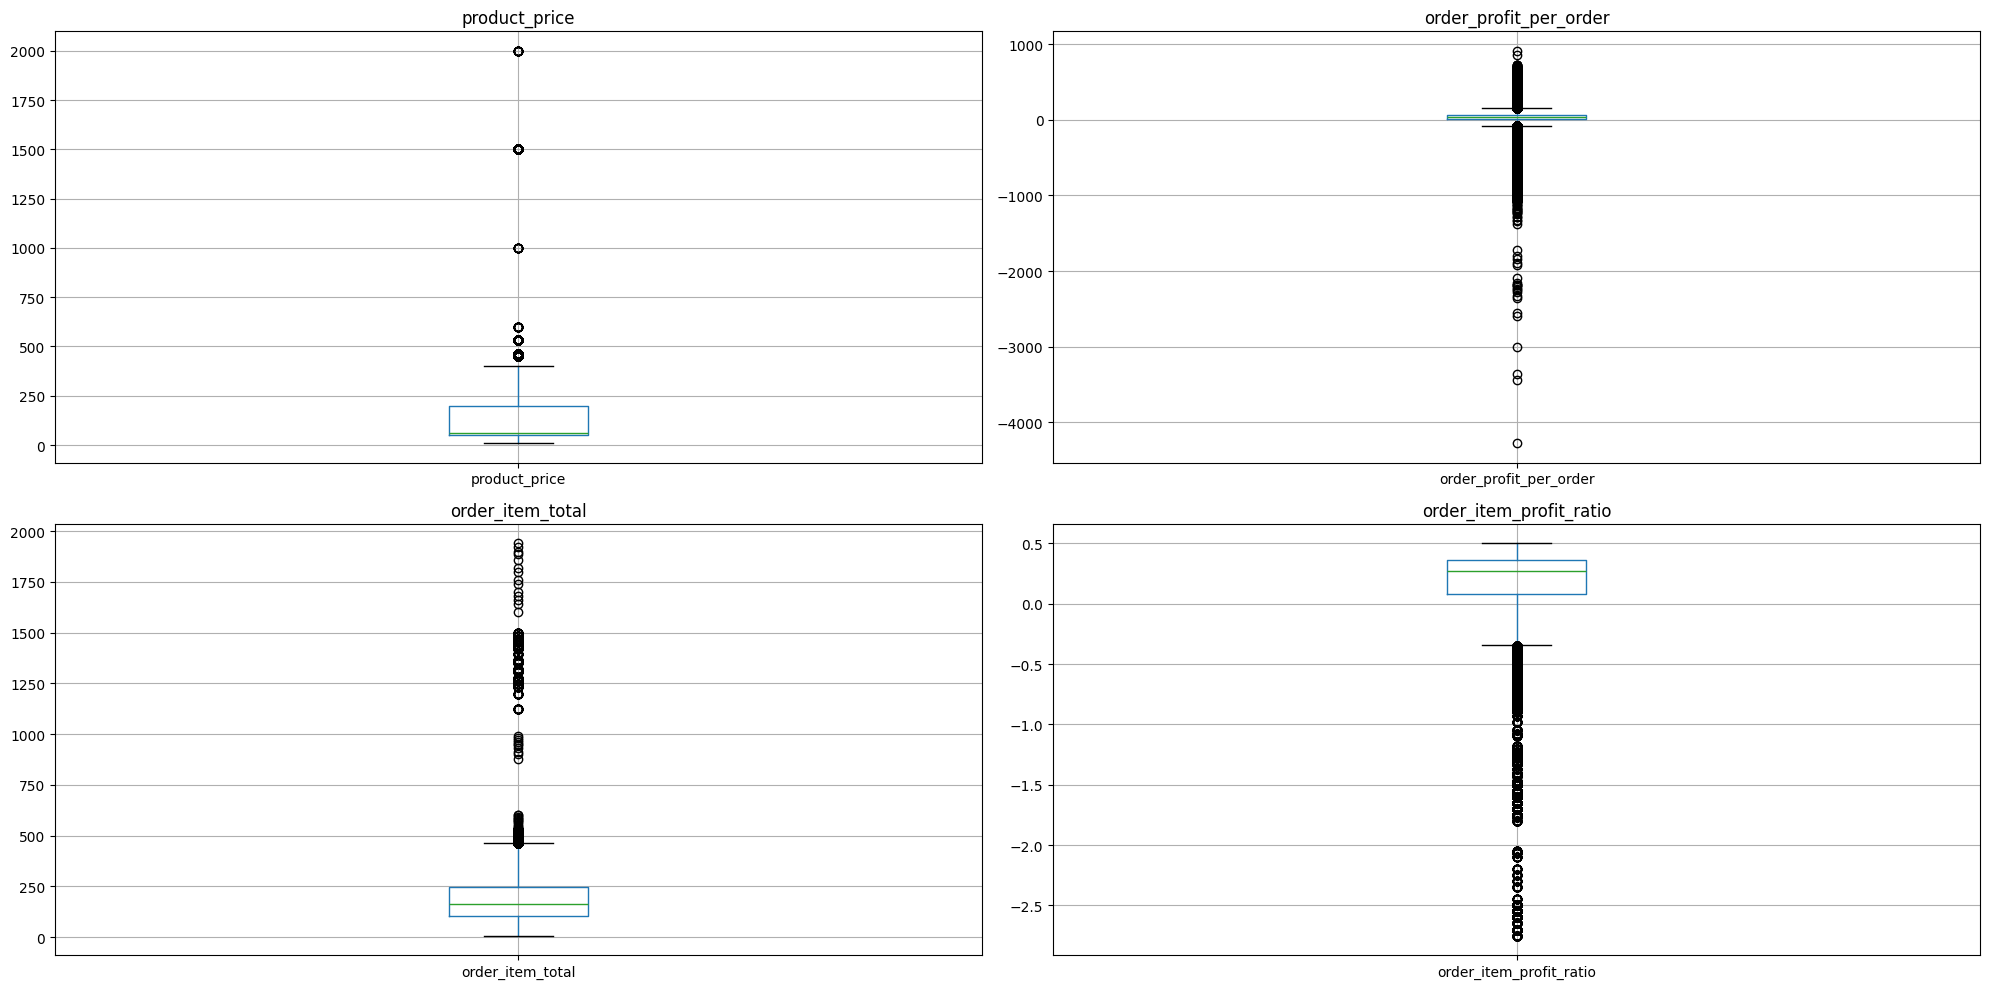

In [10]:
# Selecting relevant columns for checking outliers
numerical_columns = ['product_price', 'order_profit_per_order', 'order_item_total', 'order_item_profit_ratio']

# Plotting boxplots for the selected columns
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    df.boxplot(column=col)
    plt.title(col)

plt.tight_layout()
plt.show()

# Distribution of the Price Bin

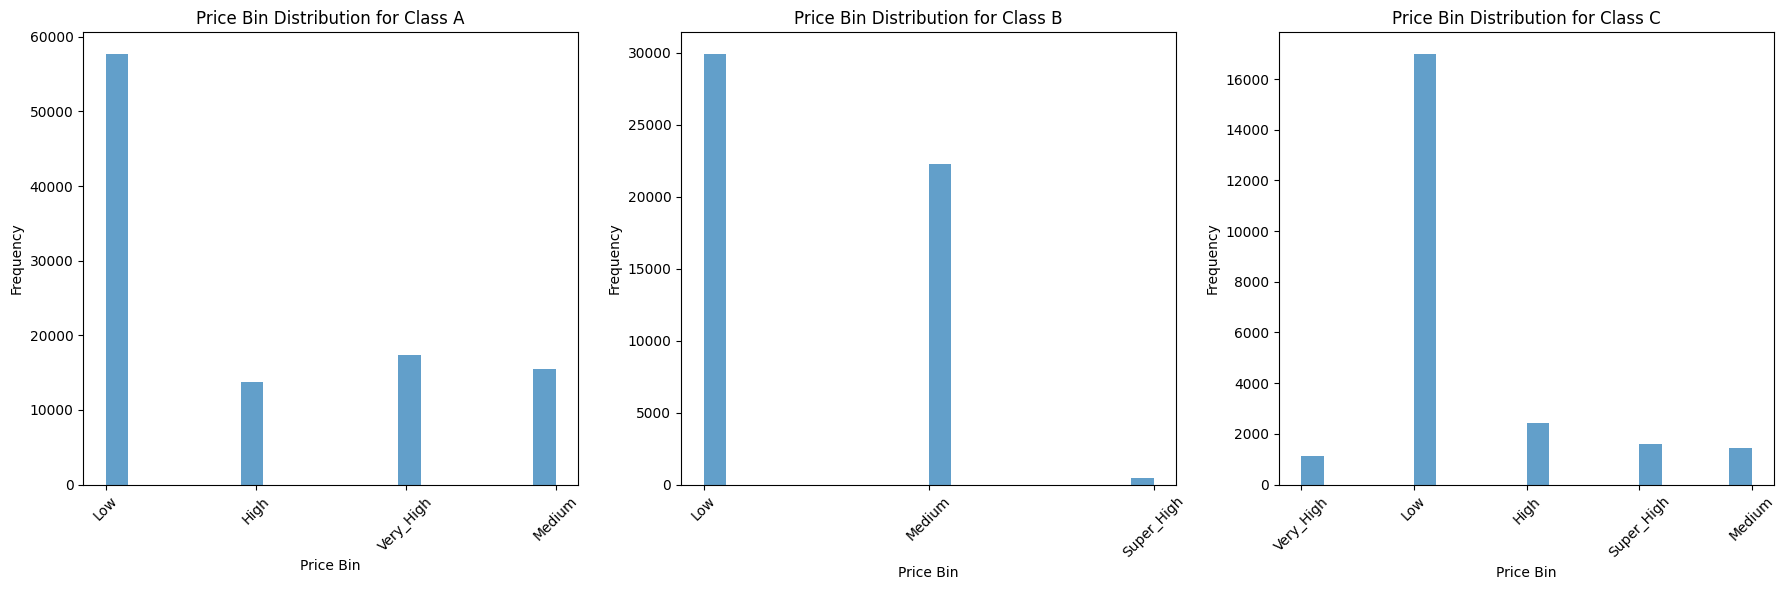

In [11]:
# Find the distribution of the
# Set the overall size of the figure
plt.figure(figsize=(18, 6))

# Plot a histogram for each class
for i, product_class in enumerate(['A', 'B', 'C']):
    plt.subplot(1, 3, i+1)  # 1 row, 3 columns, ith subplot
    subset = df[df['class'] == product_class]['price_bin']
    plt.hist(subset, bins=20, alpha=0.7)  # You can adjust the number of bins as needed
    plt.title(f'Price Bin Distribution for Class {product_class}')
    plt.xlabel('Price Bin')
    plt.xticks(rotation = 45)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\alex2\AppData\Local\Temp\ipykernel_29356\1899546237.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(price_bin_categories, rotation=45)
C:\Users\alex2\AppData\Local\Temp\ipykernel_29356\1899546237.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(price_bin_categories, rotation=45)
C:\Users\alex2\AppData\Local\Temp\ipykernel_29356\1899546237.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(price_bin_categories, rotation=45)


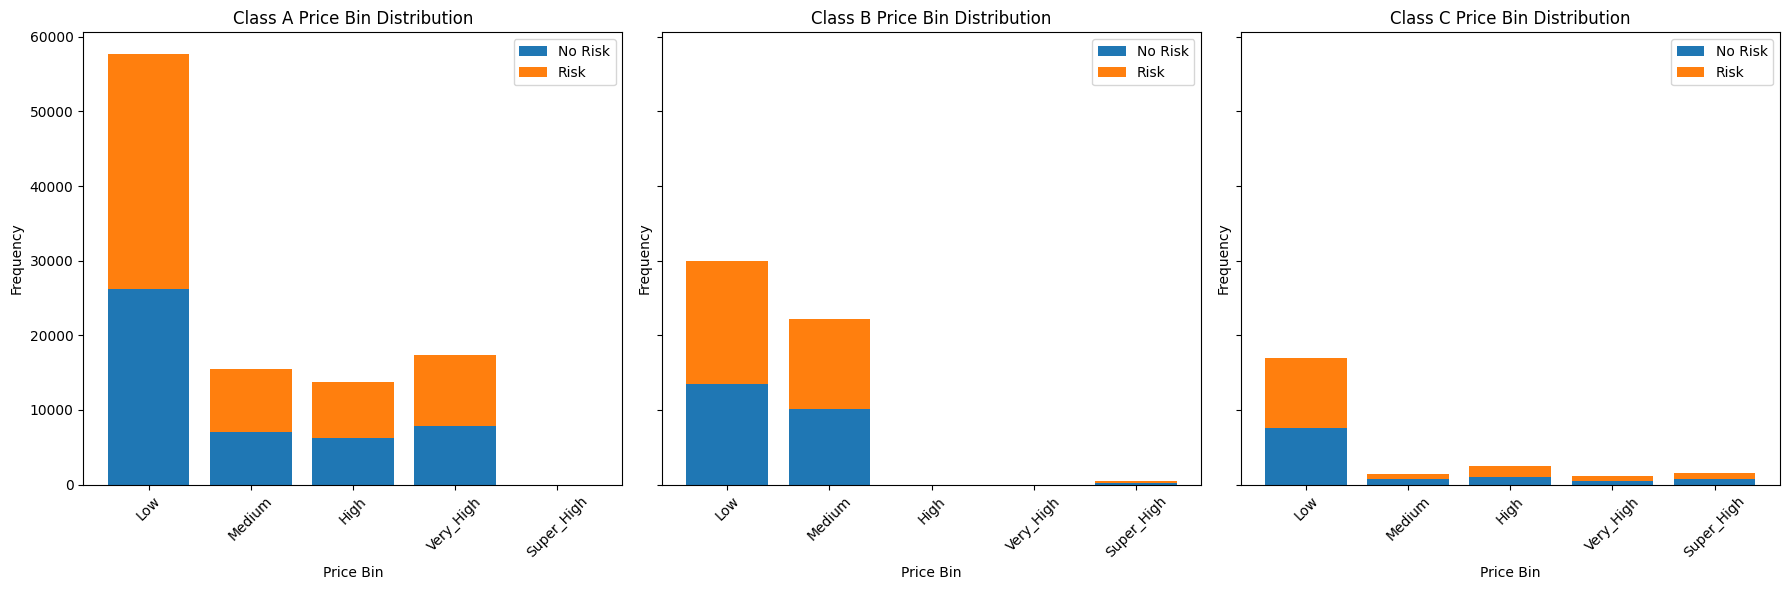

In [12]:
# 'class' as the category column with values 'A', 'B', 'C', and 'late_delivery_risk' as a binary column.

# Create a figure with a subplot for each class category
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define the custom order for the price bins
custom_order = {
    'Low': 1, 'Medium': 2, 'High': 3, 'Very_High': 4, 'Super_High': 5
}

# Define the unique categories of price bins
price_bin_categories = sorted(df['price_bin'].unique(), key=lambda x: custom_order[x])

# Iterate over each class category to create a stacked histogram
for i, product_class in enumerate(['A', 'B', 'C']):
    # Subset the DataFrame for the class
    subset = df[df['class'] == product_class]

    # Get the counts for each price bin without late delivery risk
    no_risk_counts = subset[subset['late_delivery_risk'] == 0]['price_bin'].value_counts().reindex(price_bin_categories).fillna(0)

    # Get the counts for each price bin with late delivery risk
    risk_counts = subset[subset['late_delivery_risk'] == 1]['price_bin'].value_counts().reindex(price_bin_categories).fillna(0)

    # Plot the histograms as stacked bars
    axes[i].bar(price_bin_categories, no_risk_counts, label='No Risk')
    axes[i].bar(price_bin_categories, risk_counts, bottom=no_risk_counts, label='Risk')
    
    # Add titles and labels
    axes[i].set_title(f'Class {product_class} Price Bin Distribution')
    axes[i].set_xlabel('Price Bin')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticklabels(price_bin_categories, rotation=45)
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

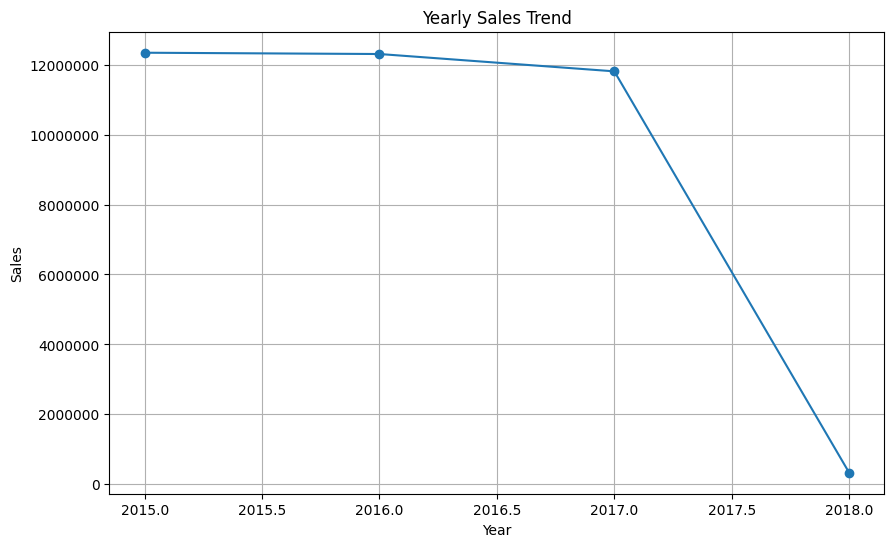

In [13]:
df['year'] = df['year'].astype(int)

# Group by year and sum up the sales for each year
yearly_sales = df.groupby('year')['sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['year'], yearly_sales['sales'], marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')

# Set y-axis numbers to display in the usual format
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.show()

In [14]:
# Group by month and sum up the sales for each month
monthly_sales = df.groupby(df['year_month'].dt.to_period('M'))['sales'].sum().reset_index()
monthly_sales.columns = ['Month', 'Total Sales (Monthly)']

# Group by quarter and sum up the sales for each quarter
quarterly_sales = df.groupby(df['year_month'].dt.to_period('Q'))['sales'].sum().reset_index()
quarterly_sales.columns = ['Quarter', 'Total Sales (Quarterly)']

# Display Monthly Sales in a table
print("Monthly Sales:")
monthly_sales_styled = monthly_sales.style.format({'Total Sales (Monthly)': '{:.2f}'})
# display(monthly_sales_styled)

# Display Quarterly Sales in a table
print("\nQuarterly Sales:")
quarterly_sales_styled = quarterly_sales.style.format({'Total Sales (Quarterly)': '{:.2f}'})
display(quarterly_sales_styled)

Monthly Sales:

Quarterly Sales:


,Quarter,Total Sales (Quarterly)
0,2015Q1,3029853.67
1,2015Q2,3088947.89
2,2015Q3,3085914.48
3,2015Q4,3136115.39
4,2016Q1,3040704.22
5,2016Q2,3033671.33
6,2016Q3,3096312.91
7,2016Q4,3133128.86
8,2017Q1,3070237.70
9,2017Q2,3175893.43


In [15]:
# Group by 'category_name_new' and sum up the sales for each category
category_sales = df.groupby('category_name_new')['sales'].sum().reset_index()
category_sales.columns = ['Category Name', 'Total Sales']

# Display the sales distribution across different product categories as a DataFrame
sales_distribution_dataframe = pd.DataFrame(category_sales)
sales_distribution_dataframe


,Category Name,Total Sales
0,clothing & apparel,3672605.22
1,electronics & gadgets,1648314.71
2,footwear,6993852.29
3,miscellaneous,7354133.03
4,outdoor,6317455.75
5,pet supplies,41524.80
6,sports equipment & accessories,10750744.56
7,toys & games,6104.66


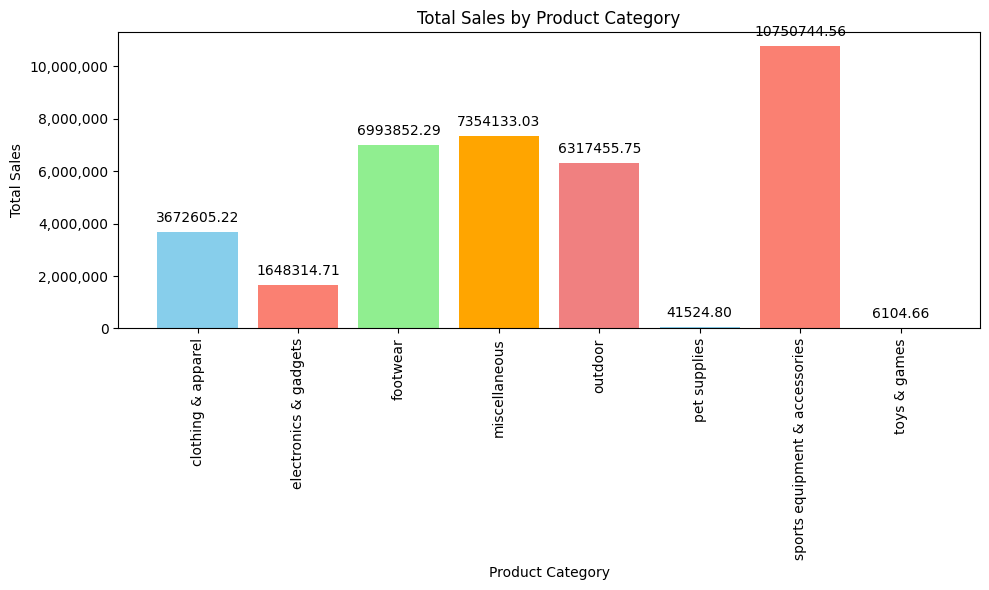

In [16]:
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']  # You can expand this list for more categories

# Plotting the sales distribution across different product categories with different colors for each bar
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(category_sales['Category Name'], category_sales['Total Sales'], color=colors)
ax.bar_label(bars, padding=5, fmt='%0.2f')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate x labels for better readability

# Set y-axis numbers to display in the usual format (not scientific notation)
plt.ticklabel_format(style='plain', axis='y')

# Show the y-axis values as integers (optional, use only if you prefer integer values)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.tight_layout()

# Show plot
plt.show()

In [17]:
category_yearly_sales = df.groupby(['category_name_new', 'year'])['sales'].sum().reset_index()
category_yearly_sales.columns = ['Category Name', 'Year', 'Total Sales']

# Set option to display numbers in regular notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display the changes in sales within specific product categories over years as a table
print("Changes in Sales within Specific Product Categories Over Years:")
category_yearly_sales

Changes in Sales within Specific Product Categories Over Years:


,Category Name,Year,Total Sales
0,clothing & apparel,2015,1269367.08
1,clothing & apparel,2016,1262448.16
2,clothing & apparel,2017,1052673.66
3,clothing & apparel,2018,88116.31
4,electronics & gadgets,2017,1517050.61
5,electronics & gadgets,2018,131264.10
6,footwear,2015,2524128.99
7,footwear,2016,2497207.20
8,footwear,2017,1972516.10
9,miscellaneous,2015,2496275.25


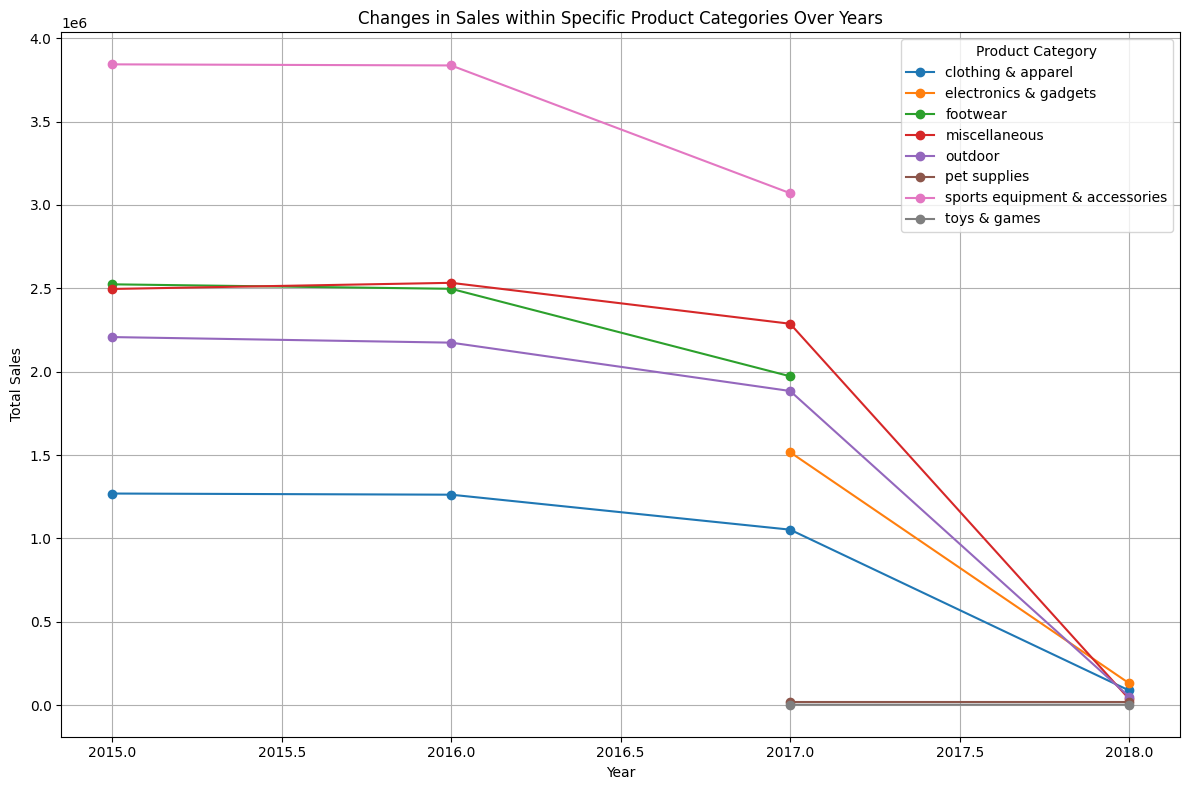

In [18]:
plt.figure(figsize=(12, 8))

# Iterate through each category to plot its yearly sales
for category in category_yearly_sales['Category Name'].unique():
    category_data = category_yearly_sales[category_yearly_sales['Category Name'] == category]
    plt.plot(category_data['Year'], category_data['Total Sales'], marker='o', label=category)

plt.title('Changes in Sales within Specific Product Categories Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [19]:
# Group by 'category_name_new' and 'year_month' as quarters, summing up the sales for each category within each quarter
category_quarterly_sales = df.groupby(['category_name_new', df['year_month'].dt.to_period('Q')])['sales'].sum().reset_index()
category_quarterly_sales.columns = ['Category Name', 'Quarter', 'Total Sales']

# Set option to display numbers in regular notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display the changes in sales within specific product categories over quarters as a table
print("Changes in Sales within Specific Product Categories Over Quarters:")
category_quarterly_sales

Changes in Sales within Specific Product Categories Over Quarters:


,Category Name,Quarter,Total Sales
0,clothing & apparel,2015Q1,315988.09
1,clothing & apparel,2015Q2,312932.97
2,clothing & apparel,2015Q3,328317.78
3,clothing & apparel,2015Q4,312128.24
4,clothing & apparel,2016Q1,309853.60
...,...,...,...
66,sports equipment & accessories,2017Q2,995379.59
67,sports equipment & accessories,2017Q3,1060539.48
68,sports equipment & accessories,2017Q4,44697.98
69,toys & games,2017Q4,2919.62


In [20]:
category_yearly_sales = df.groupby(['class', 'year'])['sales'].sum().reset_index()
category_yearly_sales.columns = ['class', 'Year', 'Total Sales']

# Set option to display numbers in regular notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display the changes in sales within specific product categories over years as a table
print("Changes in Sales within Specific Product Categories Over Years:")
category_yearly_sales

Changes in Sales within Specific Product Categories Over Years:


,class,Year,Total Sales
0,A,2015,9214816.69
1,A,2016,9190028.31
2,A,2017,6979655.69
3,B,2015,2562278.59
4,B,2016,2565574.87
5,B,2017,2584980.78
6,C,2015,563736.15
7,C,2016,548214.14
8,C,2017,2243799.67
9,C,2018,331650.12


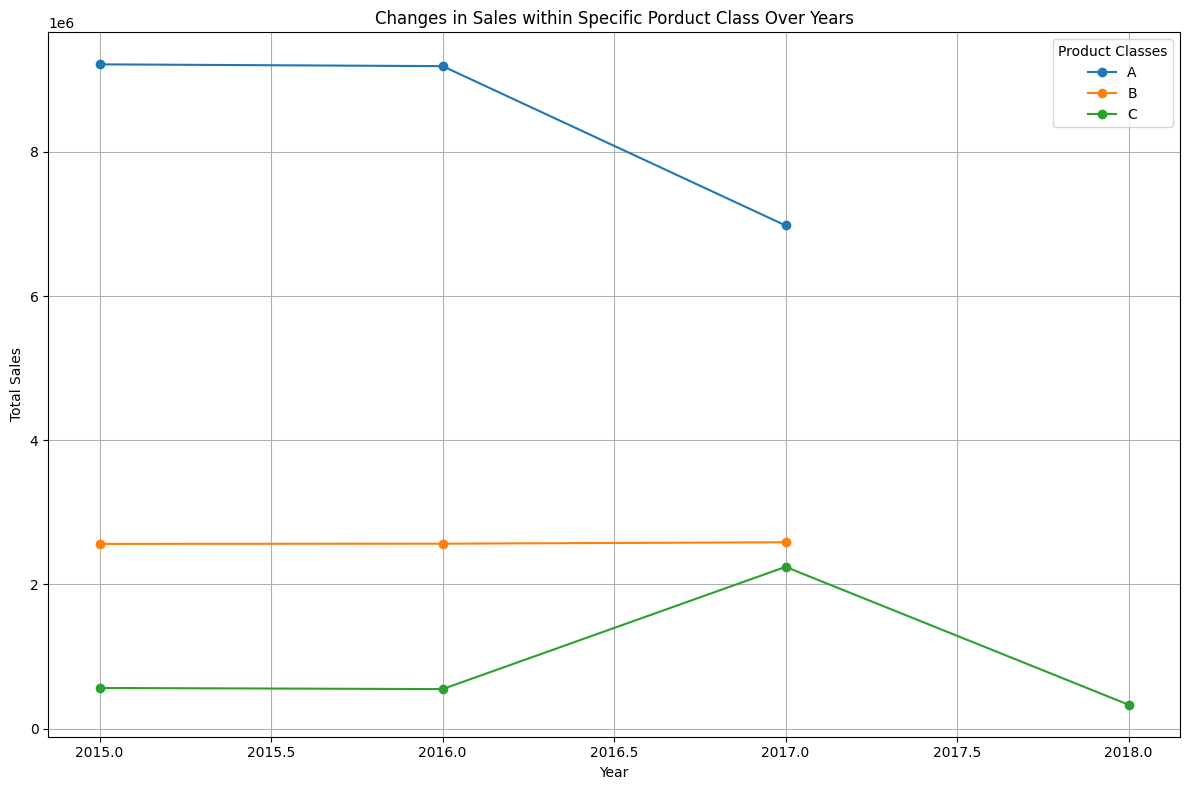

In [21]:
plt.figure(figsize=(12, 8))

# Iterate through each category to plot its yearly sales
for category in category_yearly_sales['class'].unique():
    category_data = category_yearly_sales[category_yearly_sales['class'] == category]
    plt.plot(category_data['Year'], category_data['Total Sales'], marker='o', label=category)

plt.title('Changes in Sales within Specific Porduct Class Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Product Classes')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [22]:
category_yearly_sales = df.groupby(['category_name_new', 'year'])['sales'].sum().reset_index()
category_yearly_sales.columns = ['Category Name', 'Year', 'Total Sales']

# Set option to display numbers in regular notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display the changes in sales within specific product categories over years as a table
print("Changes in Sales within Specific Product Categories Over Years:")
category_yearly_sales

Changes in Sales within Specific Product Categories Over Years:


,Category Name,Year,Total Sales
0,clothing & apparel,2015,1269367.08
1,clothing & apparel,2016,1262448.16
2,clothing & apparel,2017,1052673.66
3,clothing & apparel,2018,88116.31
4,electronics & gadgets,2017,1517050.61
5,electronics & gadgets,2018,131264.10
6,footwear,2015,2524128.99
7,footwear,2016,2497207.20
8,footwear,2017,1972516.10
9,miscellaneous,2015,2496275.25


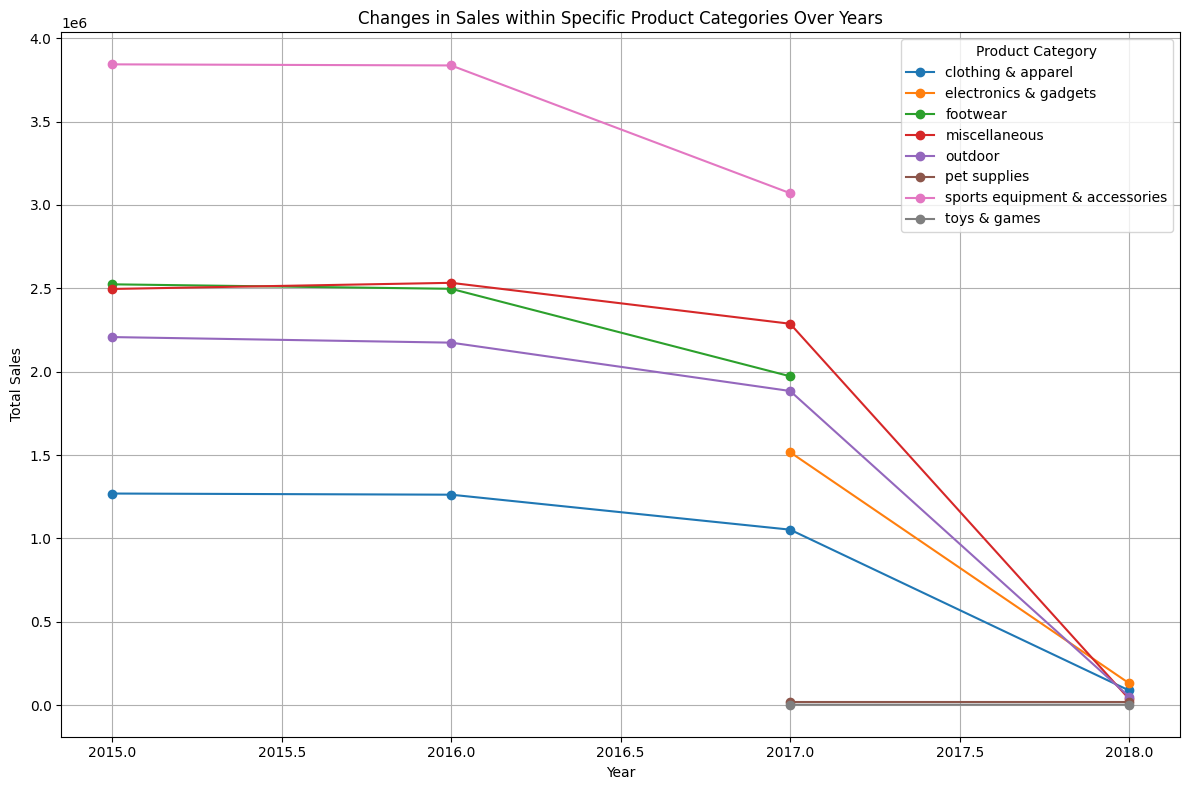

In [23]:
plt.figure(figsize=(12, 8))

# Iterate through each category to plot its yearly sales
for category in category_yearly_sales['Category Name'].unique():
    category_data = category_yearly_sales[category_yearly_sales['Category Name'] == category]
    plt.plot(category_data['Year'], category_data['Total Sales'], marker='o', label=category)

plt.title('Changes in Sales within Specific Product Categories Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [24]:
# Convert 'year_month' to datetime format
df['year_month'] = pd.to_datetime(df['year_month'])

# Extract quarterly and yearly information from 'year_month'
df['Quarter'] = df['year_month'].dt.to_period('Q') # Derived a new 'Quarter' column
df['Year'] = df['year_month'].dt.to_period('Y')

# Seasonal Analysis

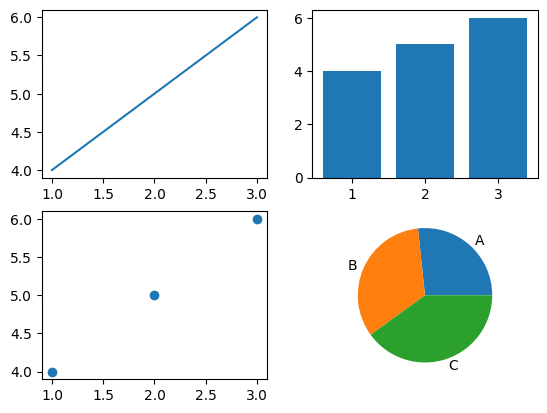

In [25]:
# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2)

# Plot a line graph in the first subplot
axes[0, 0].plot([1, 2, 3], [4, 5, 6])

# Plot a bar graph in the second subplot
axes[0, 1].bar([1, 2, 3], [4, 5, 6])

# Plot a scatter plot in the third subplot
axes[1, 0].scatter([1, 2, 3], [4, 5, 6])

# Plot a pie chart in the fourth subplot
axes[1, 1].pie([4, 5, 6], labels=['A', 'B', 'C'])

# Show the figure
plt.show()

In [26]:
# Group by quarter and year, as well as by category, and sum up the sales for each category within each quarter and year
quarterly_sales = df.groupby(['Quarter', 'category_name_new'])['sales'].sum().reset_index()
yearly_sales = df.groupby(['Year', 'category_name_new'])['sales'].sum().reset_index()

# Set option to display numbers in regular notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display the seasonal trends in sales correlated with specific product categories on a quarterly basis
print("Seasonal Trends in Sales Quarterly Correlated with Product Categories:")
quarterly_sales


Seasonal Trends in Sales Quarterly Correlated with Product Categories:


,Quarter,category_name_new,sales
0,2015Q1,clothing & apparel,315988.09
1,2015Q1,footwear,599030.25
2,2015Q1,miscellaneous,603569.84
3,2015Q1,outdoor,550606.83
4,2015Q1,sports equipment & accessories,960658.66
...,...,...,...
66,2018Q1,electronics & gadgets,131264.10
67,2018Q1,miscellaneous,37194.58
68,2018Q1,outdoor,51127.68
69,2018Q1,pet supplies,20762.40


In [27]:
# Display the seasonal trends in sales correlated with specific product categories on a yearly basis
print("\nSeasonal Trends in Sales Yearly Correlated with Product Categories:")
yearly_sales


Seasonal Trends in Sales Yearly Correlated with Product Categories:


,Year,category_name_new,sales
0,2015,clothing & apparel,1269367.08
1,2015,footwear,2524128.99
2,2015,miscellaneous,2496275.25
3,2015,outdoor,2207744.49
4,2015,sports equipment & accessories,3843315.62
5,2016,clothing & apparel,1262448.16
6,2016,footwear,2497207.20
7,2016,miscellaneous,2533073.41
8,2016,outdoor,2174299.38
9,2016,sports equipment & accessories,3836789.18


In [28]:
# Group by 'year' and 'customer_segment', summing up the sales for each segment within each year
segment_yearly_sales = df.groupby(['year', 'customer_segment'])['sales'].sum().reset_index()
segment_yearly_sales.columns = ['Year', 'Customer Segment', 'Total Sales (Yearly)']

# Group by 'Quarter', 'customer_segment', summing up the sales for each segment within each quarter
df['Quarter'] = df['year_month'].dt.to_period('Q')
segment_quarterly_sales = df.groupby(['Quarter', 'customer_segment'])['sales'].sum().reset_index()
segment_quarterly_sales.columns = ['Quarter', 'Customer Segment', 'Total Sales (Quarterly)']

# Set option to display numbers in regular notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display changes in sales patterns over years by different customer segments
print("Changes in Sales Patterns Over Years by Customer Segments:")
segment_yearly_sales




Changes in Sales Patterns Over Years by Customer Segments:


,Year,Customer Segment,Total Sales (Yearly)
0,2015,consumer,6374924.37
1,2015,corporate,3778905.37
2,2015,home office,2187001.68
3,2016,consumer,6453409.22
4,2016,corporate,3671523.60
5,2016,home office,2178884.50
6,2017,consumer,6104626.32
7,2017,corporate,3613247.68
8,2017,home office,2090562.15
9,2018,consumer,162830.24


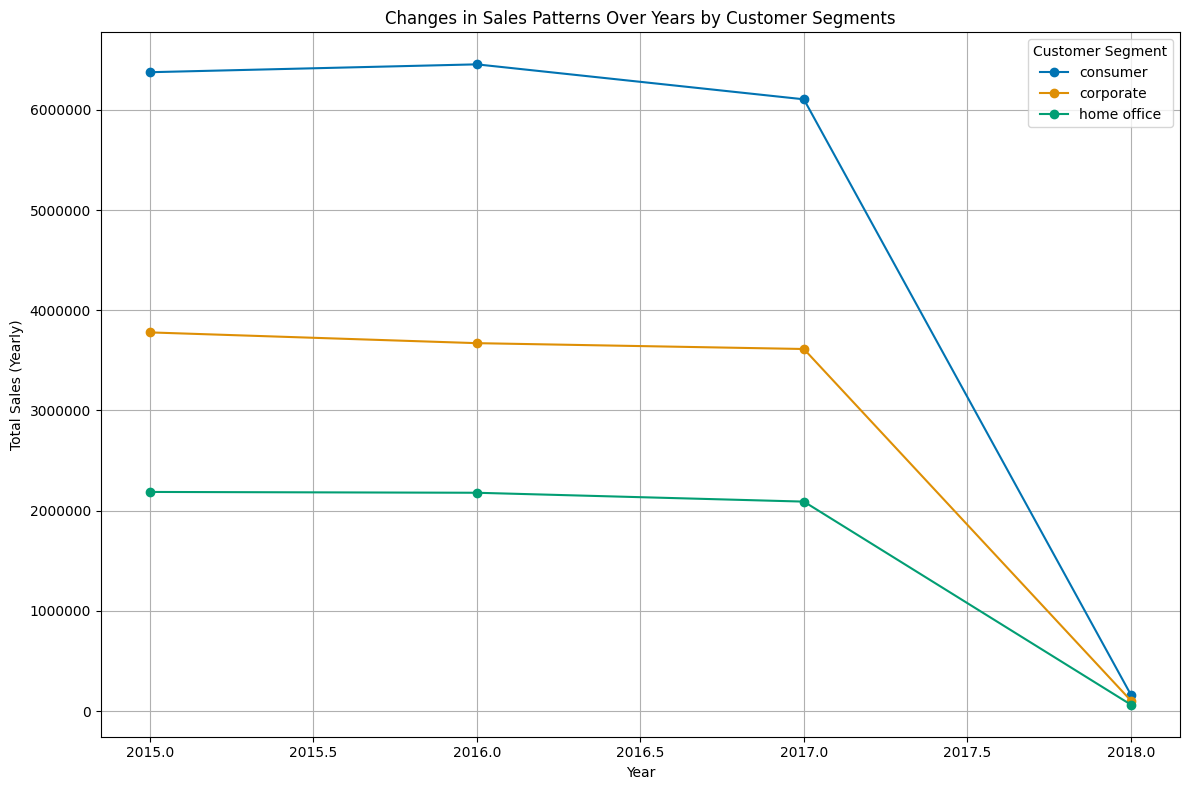

In [29]:

plt.figure(figsize=(12, 8))

# Use Seaborn for better color palettes
sns.set_palette("colorblind")

# Plot a line for each customer segment
for segment in segment_yearly_sales['Customer Segment'].unique():
    segment_data = segment_yearly_sales[segment_yearly_sales['Customer Segment'] == segment]
    plt.plot(segment_data['Year'], segment_data['Total Sales (Yearly)'], marker='o', label=segment)

plt.title('Changes in Sales Patterns Over Years by Customer Segments')
plt.xlabel('Year')
plt.ylabel('Total Sales (Yearly)')
plt.legend(title='Customer Segment')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')  # Set y-axis numbers to display in normal format

plt.tight_layout()

# Show plot
plt.show()


In [30]:
# Display changes in sales patterns over quarters by different customer segments
print("\nChanges in Sales Patterns Over Quarters by Customer Segments:")
segment_quarterly_sales


Changes in Sales Patterns Over Quarters by Customer Segments:


,Quarter,Customer Segment,Total Sales (Quarterly)
0,2015Q1,consumer,1572711.02
1,2015Q1,corporate,913965.65
2,2015Q1,home office,543177.00
3,2015Q2,consumer,1610907.04
4,2015Q2,corporate,939523.02
5,2015Q2,home office,538517.83
6,2015Q3,consumer,1593362.88
7,2015Q3,corporate,959261.85
8,2015Q3,home office,533289.75
9,2015Q4,consumer,1597943.43


# Correlation Analysis

In [31]:
# Group by 'year_month' and 'category_name_new', summing up the sales for each category within semi-annual and yearly periods
semi_annual_sales = df.groupby([pd.Grouper(key='year_month', freq='6M'), 'class'])['sales'].sum().reset_index()
yearly_sales = df.groupby([pd.Grouper(key='year_month', freq='Y'), 'class'])['sales'].sum().reset_index()

# Calculate popularity or introduction of a category based on count or presence within semi-annual and yearly periods
semi_annual_presence = df.groupby([pd.Grouper(key='year_month', freq='6M'), 'class']).size().reset_index(name='Category Count')
yearly_presence = df.groupby([pd.Grouper(key='year_month', freq='Y'), 'class']).size().reset_index(name='Category Count')

# Merge the dataframes based on time period and category name
merged_semi_annual = pd.merge(semi_annual_sales, semi_annual_presence, on=['year_month', 'class'])
merged_yearly = pd.merge(yearly_sales, yearly_presence, on=['year_month', 'class'])

# Calculate correlation between sales and category count for semi-annual and yearly periods
correlation_semi_annual = merged_semi_annual['sales'].corr(merged_semi_annual['Category Count'])
correlation_yearly = merged_yearly['sales'].corr(merged_yearly['Category Count'])

# Display correlations between changes in sales trends and the introduction/popularity of specific product categories over semi-annual and yearly periods
print(f"Correlation between Sales Trends and Category Introduction/Popularity (Semi-Annual): {correlation_semi_annual:.2f}")
print(f"Correlation between Sales Trends and Category Introduction/Popularity (Yearly): {correlation_yearly:.2f}")

Correlation between Sales Trends and Category Introduction/Popularity (Semi-Annual): 0.97
Correlation between Sales Trends and Category Introduction/Popularity (Yearly): 0.97


In [32]:
periods = ['Semi-Annual', 'Yearly']
correlations = [correlation_semi_annual, correlation_yearly]

fig = px.bar(x=periods, y=correlations, color=periods, labels={'x': 'Time Period', 'y': 'Correlation Coefficient'}, 
             title='Correlation between Sales Trends and Product Classes')
fig.show()

In [33]:
# Group by 'year_month' and 'category_name_new', summing up the sales for each category within semi-annual and yearly periods
semi_annual_sales = df.groupby([pd.Grouper(key='year_month', freq='6M'), 'category_name_new'])['sales'].sum().reset_index()
yearly_sales = df.groupby([pd.Grouper(key='year_month', freq='Y'), 'category_name_new'])['sales'].sum().reset_index()

# Calculate popularity or introduction of a category based on count or presence within semi-annual and yearly periods
semi_annual_presence = df.groupby([pd.Grouper(key='year_month', freq='6M'), 'category_name_new']).size().reset_index(name='Category Count')
yearly_presence = df.groupby([pd.Grouper(key='year_month', freq='Y'), 'category_name_new']).size().reset_index(name='Category Count')

# Merge the dataframes based on time period and category name
merged_semi_annual = pd.merge(semi_annual_sales, semi_annual_presence, on=['year_month', 'category_name_new'])
merged_yearly = pd.merge(yearly_sales, yearly_presence, on=['year_month', 'category_name_new'])

# Calculate correlation between sales and category count for semi-annual and yearly periods
correlation_semi_annual = merged_semi_annual['sales'].corr(merged_semi_annual['Category Count'])
correlation_yearly = merged_yearly['sales'].corr(merged_yearly['Category Count'])

# Display correlations between changes in sales trends and the introduction/popularity of specific product categories over semi-annual and yearly periods
print(f"Correlation between Sales Trends and Category Introduction/Popularity (Semi-Annual): {correlation_semi_annual:.2f}")
print(f"Correlation between Sales Trends and Category Introduction/Popularity (Yearly): {correlation_yearly:.2f}")

Correlation between Sales Trends and Category Introduction/Popularity (Semi-Annual): 0.88
Correlation between Sales Trends and Category Introduction/Popularity (Yearly): 0.92


In [34]:
import plotly.express as px

periods = ['Semi-Annual', 'Yearly']
correlations = [correlation_semi_annual, correlation_yearly]

fig = px.bar(x=periods, y=correlations, color=periods, labels={'x': 'Time Period', 'y': 'Correlation Coefficient'}, 
             title='Correlation between Sales Trends and Category Introduction/Popularity')
fig.show()

In [35]:
# Convert 'year_month' to datetime to make sure it's in the correct format
# df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')

# Calculate quarterly profit per order
quarterly_profit = df.groupby('Quarter')['order_profit_per_order'].mean().reset_index(name='Quarterly Profit')

# Calculate quarterly sales
quarterly_sales = df.groupby('Quarter')['order_item_total'].mean().reset_index(name='Quarterly Sales')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(quarterly_profit, quarterly_sales, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Quarterly Profit'].corr(merged_quarterly_data['Quarterly Sales'])

print(f'The correlation is: {correlation:.3f}')
merged_quarterly_data

The correlation is: 0.984


,Quarter,Quarterly Profit,Quarterly Sales
0,2015Q1,21.06,176.63
1,2015Q2,21.16,177.77
2,2015Q3,22.09,176.47
3,2015Q4,19.92,177.16
4,2016Q1,19.12,177.15
5,2016Q2,21.35,176.47
6,2016Q3,22.41,176.09
7,2016Q4,20.87,177.31
8,2017Q1,22.54,178.39
9,2017Q2,22.05,184.30


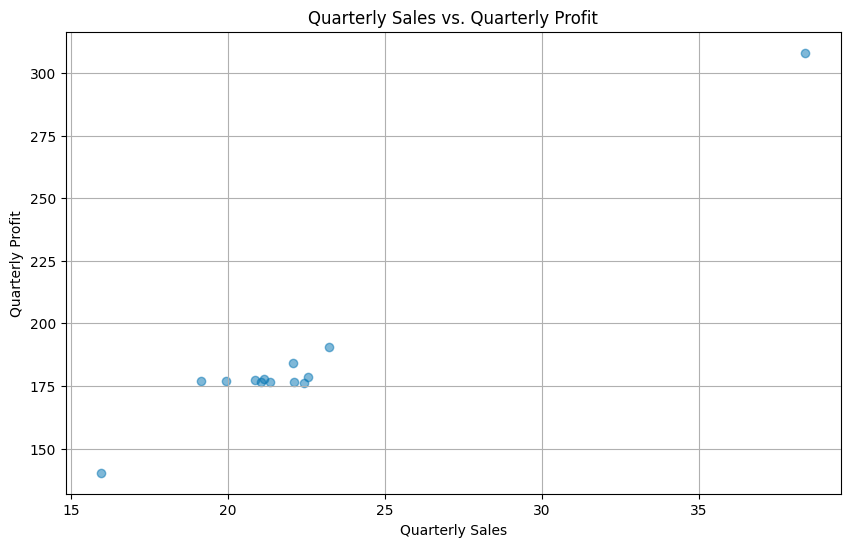

In [36]:
# Merge the Series into a single DataFrame for plotting
quarterly_data = pd.concat([quarterly_profit['Quarterly Profit'], quarterly_sales['Quarterly Sales']], axis=1)
quarterly_data.columns = ['Quarterly Profit', 'Quarterly Sales']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(quarterly_data['Quarterly Profit'], quarterly_data['Quarterly Sales'], alpha=0.5)
plt.title('Quarterly Sales vs. Quarterly Profit')
plt.xlabel('Quarterly Sales')
plt.ylabel('Quarterly Profit')
plt.grid(True)
plt.show()

In [37]:
# What is the relationship between cost per order and the profit
# Calculate the Cost Per Order
df['cost_per_order'] = df['order_item_total'] - df['order_profit_per_order']

# Calculate quarterly profit per order
quarterly_cost = df.groupby('Quarter')['cost_per_order'].mean().reset_index(name='Quarterly Cost')

# Calculate quarterly sales
quarterly_profits = df.groupby('Quarter')['profit_margin_per_order'].mean().reset_index(name='Quarterly Profit')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(quarterly_cost, quarterly_profits, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Quarterly Cost'].corr(merged_quarterly_data['Quarterly Profit'])

print(f'The correlation is: {correlation:.3f}')
correlation_cost_and_profit = correlation
merged_quarterly_data

The correlation is: 0.312


,Quarter,Quarterly Cost,Quarterly Profit
0,2015Q1,155.57,0.12
1,2015Q2,156.61,0.12
2,2015Q3,154.38,0.13
3,2015Q4,157.24,0.12
4,2016Q1,158.03,0.11
5,2016Q2,155.12,0.12
6,2016Q3,153.68,0.12
7,2016Q4,156.44,0.12
8,2017Q1,155.85,0.13
9,2017Q2,162.25,0.12


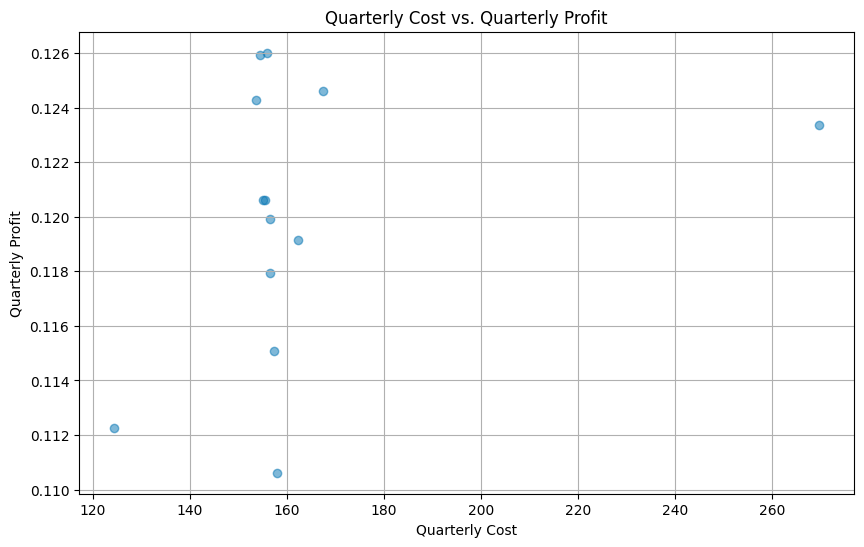

In [38]:
# Merge the Series into a single DataFrame for plotting
quarterly_data = pd.concat([quarterly_cost['Quarterly Cost'], quarterly_profits['Quarterly Profit']], axis=1)
quarterly_data.columns = ['Quarterly Cost', 'Quarterly Profit']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(quarterly_data['Quarterly Cost'], quarterly_data['Quarterly Profit'], alpha=0.5)
plt.title('Quarterly Cost vs. Quarterly Profit')
plt.xlabel('Quarterly Cost')
plt.ylabel('Quarterly Profit')
plt.grid(True)
plt.show()

In [39]:
# Calculate the relationship between Cumulative Cost per Order vs. Late Delivery
quarterly_cost = df.groupby('Quarter')['cost_per_order'].sum().reset_index(name='Quarter Cost')

late_delivery_num = df.groupby('Quarter')['late_delivery_risk'].sum().reset_index(name='Late Delivery Num')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(quarterly_cost, late_delivery_num, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Quarter Cost'].corr(merged_quarterly_data['Late Delivery Num'])

print(f'The correlation is: {correlation:.3f}')
merged_quarterly_data

The correlation is: 0.950


,Quarter,Quarter Cost,Late Delivery Num
0,2015Q1,2397865.09,8410
1,2015Q2,2445807.49,8489
2,2015Q3,2425580.26,8789
3,2015Q4,2501433.81,8684
4,2016Q1,2437037.68,8510
5,2016Q2,2397030.34,8639
6,2016Q3,2427941.00,8540
7,2016Q4,2483868.67,8757
8,2017Q1,2411043.52,8434
9,2017Q2,2511588.23,8295


In [40]:
# Correlation between Discount Rate vs. Profit
quarterly_discount = df.groupby('Quarter')['order_item_discount_rate'].mean().reset_index(name='Quarterly Discount Rate')

# Format the 'Quarterly Discount Rate' to two decimal places
quarterly_discount['Quarterly Discount Rate'] = quarterly_discount['Quarterly Discount Rate'].round(3)

# Calculate quarterly sales
quarterly_profits = df.groupby('Quarter')['profit_margin_per_order'].mean().reset_index(name='Quarterly Profit')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(quarterly_discount, quarterly_profits, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Quarterly Discount Rate'].corr(merged_quarterly_data['Quarterly Profit'])

print(f'The correlation is: {correlation:.3f}')
correlation_discount_and_profit = correlation
merged_quarterly_data

The correlation is: -0.376


,Quarter,Quarterly Discount Rate,Quarterly Profit
0,2015Q1,0.10,0.12
1,2015Q2,0.10,0.12
2,2015Q3,0.10,0.13
3,2015Q4,0.10,0.12
4,2016Q1,0.10,0.11
5,2016Q2,0.10,0.12
6,2016Q3,0.10,0.12
7,2016Q4,0.10,0.12
8,2017Q1,0.10,0.13
9,2017Q2,0.10,0.12


In [41]:
# Correlation between Late Delivery vs. Profit
late_delivery_avg = df.groupby('Quarter')['late_delivery_risk'].mean().reset_index(name='Late delivery Avg')

# Calculate quarterly sales
quarterly_profits = df.groupby('Quarter')['profit_margin_per_order'].mean().reset_index(name='Quarterly Profit')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(late_delivery_avg, quarterly_profits, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Late delivery Avg'].corr(merged_quarterly_data['Quarterly Profit'])

print(f'The correlation is: {correlation:.3f}')
correlation_late_and_profit = correlation
merged_quarterly_data

The correlation is: -0.186


,Quarter,Late delivery Avg,Quarterly Profit
0,2015Q1,0.55,0.12
1,2015Q2,0.54,0.12
2,2015Q3,0.56,0.13
3,2015Q4,0.55,0.12
4,2016Q1,0.55,0.11
5,2016Q2,0.56,0.12
6,2016Q3,0.54,0.12
7,2016Q4,0.55,0.12
8,2017Q1,0.55,0.13
9,2017Q2,0.54,0.12


In [42]:
print(correlation_late_and_profit)

-0.1863608427404164


In [43]:
measurement = ['Cost per Order', 'Discount Rate', 'Late Delivery Risk']
correlations = [correlation_cost_and_profit, correlation_discount_and_profit, correlation_late_and_profit]
fig = px.bar(x=measurement, y=correlations, color=correlations,
            labels={'x': 'Factors', 'y': 'Correlation Coefficient'}, 
            title='Overall Correlation of related factors with Profit Margin')
fig.update_traces(text=[f"{x:.3f}" for x in correlations], 
                  textposition='outside')
fig.show()

## Condcut the profit margin per order

In [44]:
# Calculate the profit margin per order
df['profit_margin_per_order'] = (df['order_item_total'] - df['cost_per_order'])/df['order_item_total']
df.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name_new,customer_city,...,shipping_month,shipping_day,price_bin,class,Quarter,Year,cost_per_order,order_date,marginal_profit_per_order,profit_margin_per_order
0,debit,3,4,91.25,314.64,advance shipping,0,73,electronics & gadgets,caguas,...,2,3,Very_High,C,2018Q1,2018,223.39,2018-01-31,0.29,0.29
1,transfer,5,4,-249.09,311.36,late delivery,1,73,electronics & gadgets,caguas,...,1,18,Very_High,C,2018Q1,2018,560.45,2018-01-13,-0.80,-0.80
2,cash,4,4,-247.78,309.72,shipping on time,0,73,electronics & gadgets,san jose,...,1,17,Very_High,C,2018Q1,2018,557.50,2018-01-13,-0.80,-0.80
3,debit,3,4,22.86,304.81,advance shipping,0,73,electronics & gadgets,los angeles,...,1,16,Very_High,C,2018Q1,2018,281.95,2018-01-13,0.07,0.07
4,payment,2,4,134.21,298.25,advance shipping,0,73,electronics & gadgets,caguas,...,1,15,Very_High,C,2018Q1,2018,164.04,2018-01-13,0.45,0.45


In [45]:
# df.to_csv("Copy of Cleaned_DataCo_Product_Recategorized_with_classes.csv", index=False)

In [46]:
# df.to_excel("Copy of Cleaned_DataCo_Product_Recategorized_with_classes.xlsx", index=False)

In [47]:
# 
df['is_profit_margin_positive'] = df['profit_margin_per_order'].apply(lambda x: 1 if x > 0 else 0)

df.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name_new,customer_city,...,shipping_day,price_bin,class,Quarter,Year,cost_per_order,order_date,marginal_profit_per_order,profit_margin_per_order,is_profit_margin_positive
0,debit,3,4,91.25,314.64,advance shipping,0,73,electronics & gadgets,caguas,...,3,Very_High,C,2018Q1,2018,223.39,2018-01-31,0.29,0.29,1
1,transfer,5,4,-249.09,311.36,late delivery,1,73,electronics & gadgets,caguas,...,18,Very_High,C,2018Q1,2018,560.45,2018-01-13,-0.80,-0.80,0
2,cash,4,4,-247.78,309.72,shipping on time,0,73,electronics & gadgets,san jose,...,17,Very_High,C,2018Q1,2018,557.50,2018-01-13,-0.80,-0.80,0
3,debit,3,4,22.86,304.81,advance shipping,0,73,electronics & gadgets,los angeles,...,16,Very_High,C,2018Q1,2018,281.95,2018-01-13,0.07,0.07,1
4,payment,2,4,134.21,298.25,advance shipping,0,73,electronics & gadgets,caguas,...,15,Very_High,C,2018Q1,2018,164.04,2018-01-13,0.45,0.45,1


e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



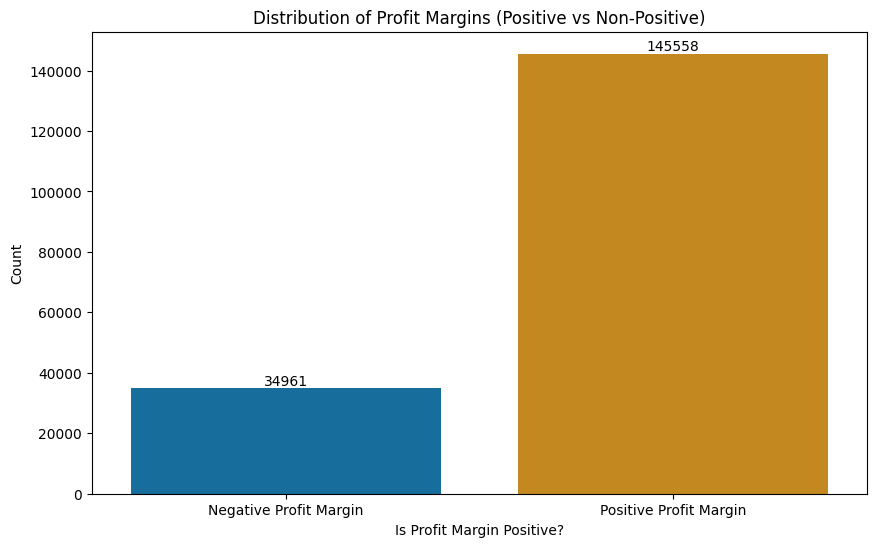

In [48]:
# Plotting
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='is_profit_margin_positive', data=df)
plt.title('Distribution of Profit Margins (Positive vs Non-Positive)')
plt.xlabel('Is Profit Margin Positive?')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative Profit Margin', 'Positive Profit Margin'])

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [49]:
df_negative_pm = df[df['is_profit_margin_positive'] == 0]
df_negative_pm.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name_new,customer_city,...,shipping_day,price_bin,class,Quarter,Year,cost_per_order,order_date,marginal_profit_per_order,profit_margin_per_order,is_profit_margin_positive
1,transfer,5,4,-249.09,311.36,late delivery,1,73,electronics & gadgets,caguas,...,18,Very_High,C,2018Q1,2018,560.45,2018-01-13,-0.80,-0.80,0
2,cash,4,4,-247.78,309.72,shipping on time,0,73,electronics & gadgets,san jose,...,17,Very_High,C,2018Q1,2018,557.50,2018-01-13,-0.80,-0.80,0
15,debit,2,1,-259.58,324.47,late delivery,1,73,electronics & gadgets,caguas,...,15,Very_High,C,2018Q1,2018,584.05,2018-01-13,-0.80,-0.80,0
16,payment,5,2,-246.36,321.20,late delivery,1,73,electronics & gadgets,canovanas,...,18,Very_High,C,2018Q1,2018,567.56,2018-01-13,-0.77,-0.77,0
28,debit,3,4,-17.14,272.03,advance shipping,0,73,electronics & gadgets,roseville,...,16,Very_High,C,2018Q1,2018,289.17,2018-01-13,-0.06,-0.06,0


In [50]:
df_positive_pm = df[df['is_profit_margin_positive'] == 1]
df_positive_pm

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name_new,customer_city,...,shipping_day,price_bin,class,Quarter,Year,cost_per_order,order_date,marginal_profit_per_order,profit_margin_per_order,is_profit_margin_positive
0,debit,3,4,91.25,314.64,advance shipping,0,73,electronics & gadgets,caguas,...,3,Very_High,C,2018Q1,2018,223.39,2018-01-31,0.29,0.29,1
3,debit,3,4,22.86,304.81,advance shipping,0,73,electronics & gadgets,los angeles,...,16,Very_High,C,2018Q1,2018,281.95,2018-01-13,0.07,0.07,1
4,payment,2,4,134.21,298.25,advance shipping,0,73,electronics & gadgets,caguas,...,15,Very_High,C,2018Q1,2018,164.04,2018-01-13,0.45,0.45,1
5,transfer,6,4,18.58,294.98,shipping canceled,0,73,electronics & gadgets,tonawanda,...,19,Very_High,C,2018Q1,2018,276.40,2018-01-13,0.06,0.06,1
6,debit,2,1,95.18,288.42,late delivery,1,73,electronics & gadgets,caguas,...,15,Very_High,C,2018Q1,2018,193.24,2018-01-13,0.33,0.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180513,payment,3,4,119.99,299.99,advance shipping,0,45,miscellaneous,lancaster,...,19,Very_High,A,2016Q1,2016,180.00,2016-01-16,0.40,0.40,1
180514,cash,4,4,40.00,399.98,shipping on time,0,45,miscellaneous,brooklyn,...,20,Very_High,A,2016Q1,2016,359.98,2016-01-16,0.10,0.10,1
180516,transfer,5,4,141.11,391.98,late delivery,1,45,miscellaneous,bristol,...,20,Very_High,A,2016Q1,2016,250.87,2016-01-15,0.36,0.36,1
180517,payment,3,4,186.23,387.98,advance shipping,0,45,miscellaneous,caguas,...,18,Very_High,A,2016Q1,2016,201.75,2016-01-15,0.48,0.48,1


In [51]:
# Correlation between Late Delivery Risk vs. Negative Profit Margin
late_delivery_avg = df_negative_pm.groupby('Quarter')['late_delivery_risk'].mean().reset_index(name='Late delivery Avg')

# Calculate quarterly sales
quarterly_profits = df_negative_pm.groupby('Quarter')['profit_margin_per_order'].mean().reset_index(name='Quarterly Negative Profit Margin')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(late_delivery_avg, quarterly_profits, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Late delivery Avg'].corr(merged_quarterly_data['Quarterly Negative Profit Margin'])

print(f'The correlation is: {correlation:.3f}')
correlation_late_vs_profit = correlation
merged_quarterly_data

The correlation is: 0.243


,Quarter,Late delivery Avg,Quarterly Negative Profit Margin
0,2015Q1,0.55,-0.61
1,2015Q2,0.54,-0.61
2,2015Q3,0.57,-0.58
3,2015Q4,0.53,-0.62
4,2016Q1,0.55,-0.61
5,2016Q2,0.57,-0.61
6,2016Q3,0.54,-0.59
7,2016Q4,0.56,-0.60
8,2017Q1,0.54,-0.60
9,2017Q2,0.54,-0.59


In [52]:
# Calculate the relationship between Cumulative Cost per Order vs. Negative Profit Margin
quarterly_cost = df_negative_pm.groupby('Quarter')['cost_per_order'].mean().reset_index(name='Quarter Cost')

late_delivery_num = df_negative_pm.groupby('Quarter')['profit_margin_per_order'].mean().reset_index(name='Quarterly Negative Profit Margin')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(quarterly_cost, late_delivery_num, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Quarter Cost'].corr(merged_quarterly_data['Quarterly Negative Profit Margin'])

print(f'The correlation is: {correlation:.3f}')
correlation_cost_vs_profit = correlation
merged_quarterly_data

The correlation is: 0.382


,Quarter,Quarter Cost,Quarterly Negative Profit Margin
0,2015Q1,285.61,-0.61
1,2015Q2,284.64,-0.61
2,2015Q3,281.47,-0.58
3,2015Q4,289.11,-0.62
4,2016Q1,288.18,-0.61
5,2016Q2,284.46,-0.61
6,2016Q3,274.96,-0.59
7,2016Q4,286.24,-0.60
8,2017Q1,285.83,-0.60
9,2017Q2,292.35,-0.59


In [53]:
# Correlation between Dicount Rate vs. Negative Profit Margin
quarterly_discount = df_negative_pm.groupby('Quarter')['order_item_discount_rate'].mean().reset_index(name='Quarterly Discount Rate')

# Format the 'Quarterly Discount Rate' to two decimal places
quarterly_discount['Quarterly Discount Rate'] = quarterly_discount['Quarterly Discount Rate'].round(3)

# Calculate quarterly sales
quarterly_profits = df_negative_pm.groupby('Quarter')['profit_margin_per_order'].mean().reset_index(name='Quarterly Negative Profit Margin')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(quarterly_discount, quarterly_profits, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Quarterly Discount Rate'].corr(merged_quarterly_data['Quarterly Negative Profit Margin'])

print(f'The correlation is: {correlation:.3f}')
correlation_discount_vs_profit = correlation
merged_quarterly_data

The correlation is: 0.614


,Quarter,Quarterly Discount Rate,Quarterly Negative Profit Margin
0,2015Q1,0.10,-0.61
1,2015Q2,0.10,-0.61
2,2015Q3,0.10,-0.58
3,2015Q4,0.10,-0.62
4,2016Q1,0.10,-0.61
5,2016Q2,0.10,-0.61
6,2016Q3,0.10,-0.59
7,2016Q4,0.10,-0.60
8,2017Q1,0.10,-0.60
9,2017Q2,0.10,-0.59


In [54]:
measurement = ['Late Delivery Risk', 'Discount Rate', 'Cost per Order']
correlations = [correlation_late_vs_profit, correlation_discount_vs_profit, correlation_cost_vs_profit]
fig = px.bar(x=measurement, y=correlations, color=correlations,
            labels={'x': 'Factors', 'y': 'Correlation Coefficient'}, 
            title='Correlation of related factors with Negative Profit Margin')
fig.update_traces(text=[f"{x:.3f}" for x in correlations], 
                  textposition='outside')
fig.show()

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



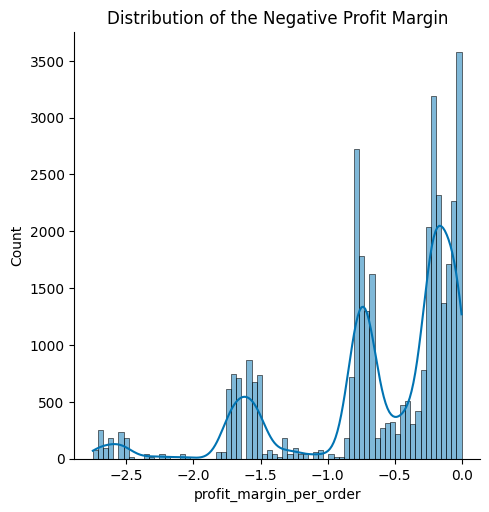

In [55]:
# Plot the Distribution
sns.displot(data=df_negative_pm, x="profit_margin_per_order", kde=True)
plt.title('Distribution of the Negative Profit Margin')
plt.show()

In [56]:
# Class A profit margin distribution
df_negative_pm_A = df_negative_pm[df_negative_pm['class'] == 'A']
df_negative_pm_B = df_negative_pm[df_negative_pm['class'] == 'B']
df_negative_pm_C = df_negative_pm[df_negative_pm['class'] == 'C']

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



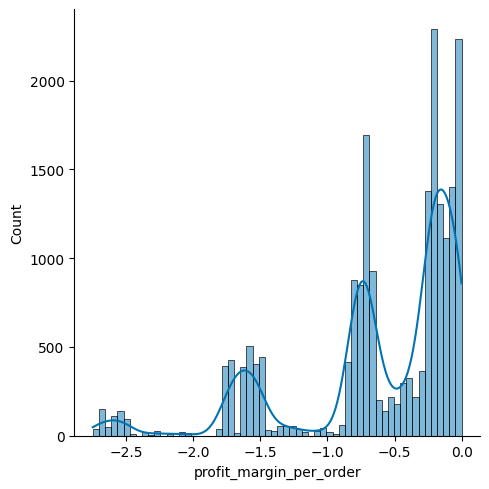

In [57]:
sns.displot(data=df_negative_pm_A, x="profit_margin_per_order", kde=True)
plt.show()

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



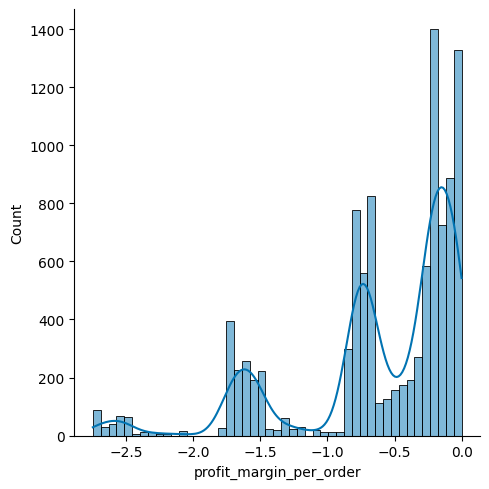

In [58]:
sns.displot(data=df_negative_pm_B, x="profit_margin_per_order", kde=True)
plt.show()

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



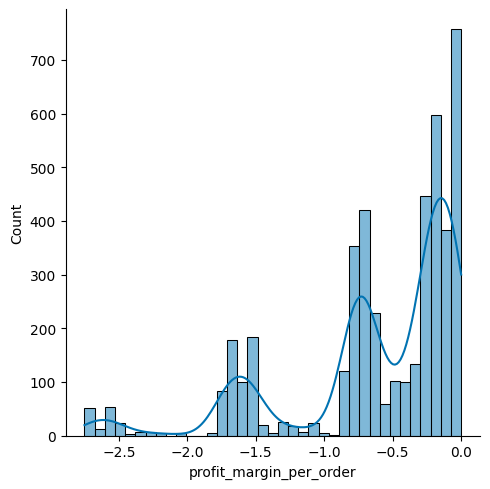

In [59]:
sns.displot(data=df_negative_pm_C, x="profit_margin_per_order", kde=True)
plt.show()

In [60]:
df_A = df[df['class'] == 'A']
df_B = df[df['class'] == 'B']
df_C = df[df['class'] == 'C']

In [61]:
# Correlation between Late Delivery vs. Profit Margin Class A
late_delivery_avg = df_A.groupby('Quarter')['late_delivery_risk'].mean().reset_index(name='Late delivery Avg')

# Calculate quarterly sales
quarterly_profits = df_A.groupby('Quarter')['profit_margin_per_order'].mean().reset_index(name='Quarterly Profit Margin')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(late_delivery_avg, quarterly_profits, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Late delivery Avg'].corr(merged_quarterly_data['Quarterly Profit Margin'])

print(f'The correlation is: {correlation:.3f}')
corr_A_late_vs_profit = correlation
merged_quarterly_data

The correlation is: -0.932


,Quarter,Late delivery Avg,Quarterly Profit Margin
0,2015Q1,0.55,0.12
1,2015Q2,0.54,0.12
2,2015Q3,0.56,0.12
3,2015Q4,0.55,0.12
4,2016Q1,0.56,0.11
5,2016Q2,0.56,0.12
6,2016Q3,0.54,0.13
7,2016Q4,0.55,0.12
8,2017Q1,0.54,0.13
9,2017Q2,0.54,0.12


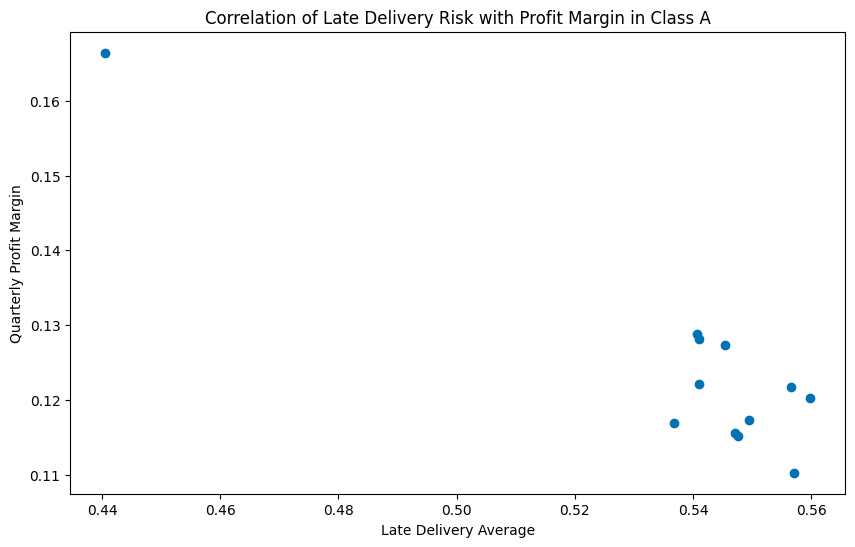

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_quarterly_data['Late delivery Avg'], merged_quarterly_data['Quarterly Profit Margin'])

# Adding labels and title
plt.title('Correlation of Late Delivery Risk with Profit Margin in Class A')
plt.xlabel('Late Delivery Average')
plt.ylabel('Quarterly Profit Margin')

# Show the plot
plt.show()

In [63]:
# Correlation between Late Delivery vs. Profit Margin Class B
late_delivery_avg = df_B.groupby('Quarter')['late_delivery_risk'].mean().reset_index(name='Late delivery Avg')

# Calculate quarterly sales
quarterly_profits = df_B.groupby('Quarter')['profit_margin_per_order'].mean().reset_index(name='Quarterly Profit Margin')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(late_delivery_avg, quarterly_profits, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Late delivery Avg'].corr(merged_quarterly_data['Quarterly Profit Margin'])

print(f'The correlation is: {correlation:.3f}')
corr_B_late_vs_profit = correlation
merged_quarterly_data

The correlation is: 0.627


,Quarter,Late delivery Avg,Quarterly Profit Margin
0,2015Q1,0.54,0.12
1,2015Q2,0.54,0.11
2,2015Q3,0.57,0.13
3,2015Q4,0.53,0.11
4,2016Q1,0.54,0.11
5,2016Q2,0.56,0.12
6,2016Q3,0.54,0.11
7,2016Q4,0.55,0.13
8,2017Q1,0.55,0.12
9,2017Q2,0.54,0.12


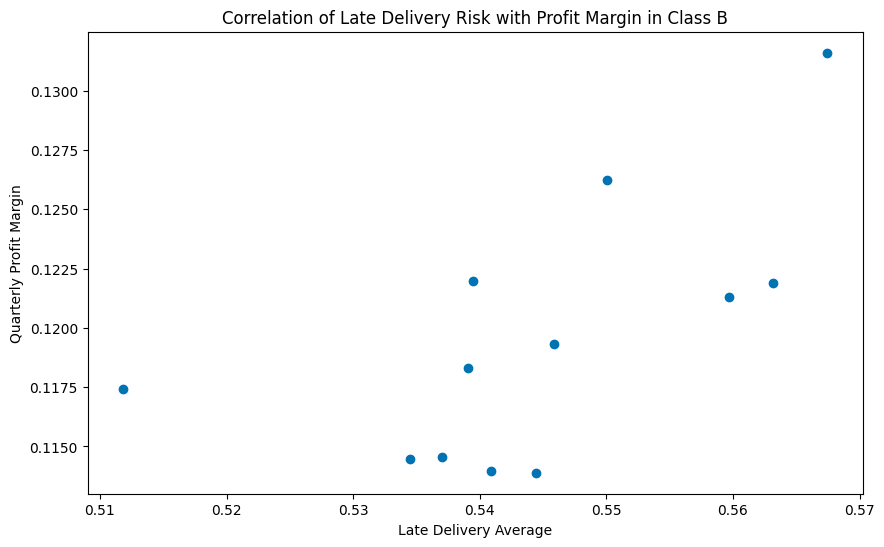

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_quarterly_data['Late delivery Avg'], merged_quarterly_data['Quarterly Profit Margin'])

# Adding labels and title
plt.title('Correlation of Late Delivery Risk with Profit Margin in Class B')
plt.xlabel('Late Delivery Average')
plt.ylabel('Quarterly Profit Margin')

# Show the plot
plt.show()

In [65]:
# Correlation between Late Delivery vs. Profit Margin Class C
late_delivery_avg = df_C.groupby('Quarter')['late_delivery_risk'].mean().reset_index(name='Late delivery Avg')

# Calculate quarterly sales
quarterly_profits = df_C.groupby('Quarter')['profit_margin_per_order'].mean().reset_index(name='Quarterly Profit Margin')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(late_delivery_avg, quarterly_profits, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Late delivery Avg'].corr(merged_quarterly_data['Quarterly Profit Margin'])

print(f'The correlation is: {correlation:.3f}')
corr_C_late_vs_profit = correlation
merged_quarterly_data

The correlation is: -0.118


,Quarter,Late delivery Avg,Quarterly Profit Margin
0,2015Q1,0.55,0.16
1,2015Q2,0.56,0.10
2,2015Q3,0.55,0.14
3,2015Q4,0.58,0.11
4,2016Q1,0.55,0.10
5,2016Q2,0.54,0.12
6,2016Q3,0.55,0.13
7,2016Q4,0.57,0.12
8,2017Q1,0.57,0.13
9,2017Q2,0.52,0.12


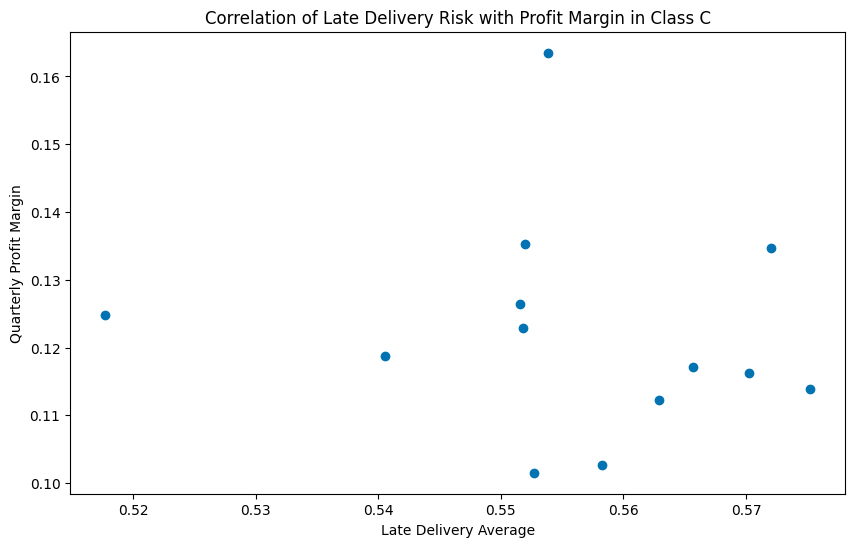

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_quarterly_data['Late delivery Avg'], merged_quarterly_data['Quarterly Profit Margin'])

# Adding labels and title
plt.title('Correlation of Late Delivery Risk with Profit Margin in Class C')
plt.xlabel('Late Delivery Average')
plt.ylabel('Quarterly Profit Margin')

# Show the plot
plt.show()

In [67]:
measurement = ['Class A', 'Class B', 'Class C']
correlations = [corr_A_late_vs_profit, corr_B_late_vs_profit, corr_C_late_vs_profit]
fig = px.bar(x=measurement, y=correlations, color=correlations,
            labels={'x': 'Late Delivery Risk', 'y': 'Correlation Coefficient'}, 
            title='Correlation of Late Delivery Risk with Profit Margin by Product Class')
fig.update_traces(text=[f"{x:.3f}" for x in correlations], 
                  textposition='outside')
fig.show()

In [68]:
# Calculate the relationship between Cost per Order vs. Profit Margin in Class A
quarterly_cost = df_A.groupby('Quarter')['cost_per_order'].mean().reset_index(name='Quarter Cost')

late_delivery_num = df_A.groupby('Quarter')['profit_margin_per_order'].mean().reset_index(name='Quarterly Profit Margin')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(quarterly_cost, late_delivery_num, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Quarter Cost'].corr(merged_quarterly_data['Quarterly Profit Margin'])

print(f'The correlation is: {correlation:.3f}')
correlation_A_cost_vs_profit = correlation
merged_quarterly_data

The correlation is: -0.967


,Quarter,Quarter Cost,Quarterly Profit Margin
0,2015Q1,192.01,0.12
1,2015Q2,192.02,0.12
2,2015Q3,190.68,0.12
3,2015Q4,196.08,0.12
4,2016Q1,195.12,0.11
5,2016Q2,191.93,0.12
6,2016Q3,189.23,0.13
7,2016Q4,193.92,0.12
8,2017Q1,191.64,0.13
9,2017Q2,194.07,0.12


In [69]:
# Calculate the relationship between Cost per Order vs. Profit Margin in Class B
quarterly_cost = df_B.groupby('Quarter')['cost_per_order'].mean().reset_index(name='Quarter Cost')

late_delivery_num = df_B.groupby('Quarter')['profit_margin_per_order'].mean().reset_index(name='Quarterly Negative Profit Margin')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(quarterly_cost, late_delivery_num, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Quarter Cost'].corr(merged_quarterly_data['Quarterly Negative Profit Margin'])

print(f'The correlation is: {correlation:.3f}')
correlation_B_cost_vs_profit = correlation
merged_quarterly_data

The correlation is: -0.127


,Quarter,Quarter Cost,Quarterly Negative Profit Margin
0,2015Q1,108.62,0.12
1,2015Q2,107.87,0.11
2,2015Q3,105.58,0.13
3,2015Q4,107.10,0.11
4,2016Q1,107.79,0.11
5,2016Q2,105.37,0.12
6,2016Q3,106.73,0.11
7,2016Q4,107.22,0.13
8,2017Q1,106.62,0.12
9,2017Q2,106.80,0.12


In [70]:
# Calculate the relationship between Cost per Order vs. Profit Margin in Class C
quarterly_cost = df_C.groupby('Quarter')['cost_per_order'].mean().reset_index(name='Quarter Cost')

late_delivery_num = df_C.groupby('Quarter')['profit_margin_per_order'].mean().reset_index(name='Quarterly Negative Profit Margin')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(quarterly_cost, late_delivery_num, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Quarter Cost'].corr(merged_quarterly_data['Quarterly Negative Profit Margin'])

print(f'The correlation is: {correlation:.3f}')
correlation_C_cost_vs_profit = correlation
merged_quarterly_data

The correlation is: -0.124


,Quarter,Quarter Cost,Quarterly Negative Profit Margin
0,2015Q1,71.82,0.16
1,2015Q2,78.25,0.10
2,2015Q3,73.89,0.14
3,2015Q4,75.84,0.11
4,2016Q1,75.68,0.10
5,2016Q2,76.19,0.12
6,2016Q3,75.52,0.13
7,2016Q4,77.03,0.12
8,2017Q1,76.56,0.13
9,2017Q2,140.14,0.12


In [71]:
measurement = ['Class A', 'Class B', 'Class C']
correlations = [correlation_A_cost_vs_profit, correlation_B_cost_vs_profit, correlation_C_cost_vs_profit]
fig = px.bar(x=measurement, y=correlations, color=correlations,
            labels={'x': 'Cost per Order', 'y': 'Correlation Coefficient'}, 
            title='Overall Correlation of Cost per Order with Profit Margin by Product Class')
fig.update_traces(text=[f"{x:.3f}" for x in correlations], 
                  textposition='outside')
fig.show()

In [72]:
# Correlation between Discount Rate vs. Profit Margin in Class A
quarterly_discount = df_A.groupby('Quarter')['order_item_discount_rate'].mean().reset_index(name='Quarterly Discount Rate')

# Format the 'Quarterly Discount Rate' to two decimal places
quarterly_discount['Quarterly Discount Rate'] = quarterly_discount['Quarterly Discount Rate'].round(3)

# Calculate quarterly sales
quarterly_profits = df_A.groupby('Quarter')['profit_margin_per_order'].mean().reset_index(name='Quarterly Profit')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(quarterly_discount, quarterly_profits, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Quarterly Discount Rate'].corr(merged_quarterly_data['Quarterly Profit'])

print(f'The correlation is: {correlation:.3f}')
correlation_A_discount_vs_profit = correlation
merged_quarterly_data

The correlation is: -0.890


,Quarter,Quarterly Discount Rate,Quarterly Profit
0,2015Q1,0.10,0.12
1,2015Q2,0.10,0.12
2,2015Q3,0.10,0.12
3,2015Q4,0.10,0.12
4,2016Q1,0.10,0.11
5,2016Q2,0.10,0.12
6,2016Q3,0.10,0.13
7,2016Q4,0.10,0.12
8,2017Q1,0.10,0.13
9,2017Q2,0.10,0.12


In [73]:
# Correlation between Discount Rate vs. Profit Margin in Class B
quarterly_discount = df_B.groupby('Quarter')['order_item_discount_rate'].mean().reset_index(name='Quarterly Discount Rate')

# Format the 'Quarterly Discount Rate' to two decimal places
quarterly_discount['Quarterly Discount Rate'] = quarterly_discount['Quarterly Discount Rate'].round(3)

# Calculate quarterly sales
quarterly_profits = df_B.groupby('Quarter')['profit_margin_per_order'].mean().reset_index(name='Quarterly Profit Margin')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(quarterly_discount, quarterly_profits, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Quarterly Discount Rate'].corr(merged_quarterly_data['Quarterly Profit Margin'])

print(f'The correlation is: {correlation:.3f}')
correlation_B_discount_vs_profit = correlation
merged_quarterly_data

The correlation is: 0.186


,Quarter,Quarterly Discount Rate,Quarterly Profit Margin
0,2015Q1,0.10,0.12
1,2015Q2,0.10,0.11
2,2015Q3,0.10,0.13
3,2015Q4,0.10,0.11
4,2016Q1,0.10,0.11
5,2016Q2,0.10,0.12
6,2016Q3,0.10,0.11
7,2016Q4,0.10,0.13
8,2017Q1,0.10,0.12
9,2017Q2,0.10,0.12


In [74]:
# Correlation between Discount Rate vs. Profit Margin in Class C
quarterly_discount = df_C.groupby('Quarter')['order_item_discount_rate'].mean().reset_index(name='Quarterly Discount Rate')

# Format the 'Quarterly Discount Rate' to two decimal places
quarterly_discount['Quarterly Discount Rate'] = quarterly_discount['Quarterly Discount Rate'].round(3)

# Calculate quarterly sales
quarterly_profits = df_C.groupby('Quarter')['profit_margin_per_order'].mean().reset_index(name='Quarterly Profit Margin')

# Merge the two dataframes on the 'year_month' column
merged_quarterly_data = pd.merge(quarterly_discount, quarterly_profits, on='Quarter')

# Calculate the correlation between 'Quarterly Profit' and 'Quarterly Sales'
correlation = merged_quarterly_data['Quarterly Discount Rate'].corr(merged_quarterly_data['Quarterly Profit Margin'])

print(f'The correlation is: {correlation:.3f}')
correlation_C_discount_vs_profit = correlation
merged_quarterly_data

The correlation is: 0.160


,Quarter,Quarterly Discount Rate,Quarterly Profit Margin
0,2015Q1,0.10,0.16
1,2015Q2,0.10,0.10
2,2015Q3,0.10,0.14
3,2015Q4,0.10,0.11
4,2016Q1,0.10,0.10
5,2016Q2,0.10,0.12
6,2016Q3,0.10,0.13
7,2016Q4,0.10,0.12
8,2017Q1,0.10,0.13
9,2017Q2,0.10,0.12


In [75]:
measurement = ['Class A', 'Class B', 'Class C']
correlations = [correlation_A_discount_vs_profit, correlation_B_discount_vs_profit, correlation_C_discount_vs_profit]
fig = px.bar(x=measurement, y=correlations, color=correlations,
            labels={'x': 'Discount Rate', 'y': 'Correlation Coefficient'}, 
            title='Correlation of Discount Rate with Profit Margin by Product Class')
fig.update_traces(text=[f"{x:.3f}" for x in correlations], 
                  textposition='outside')
fig.show()

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



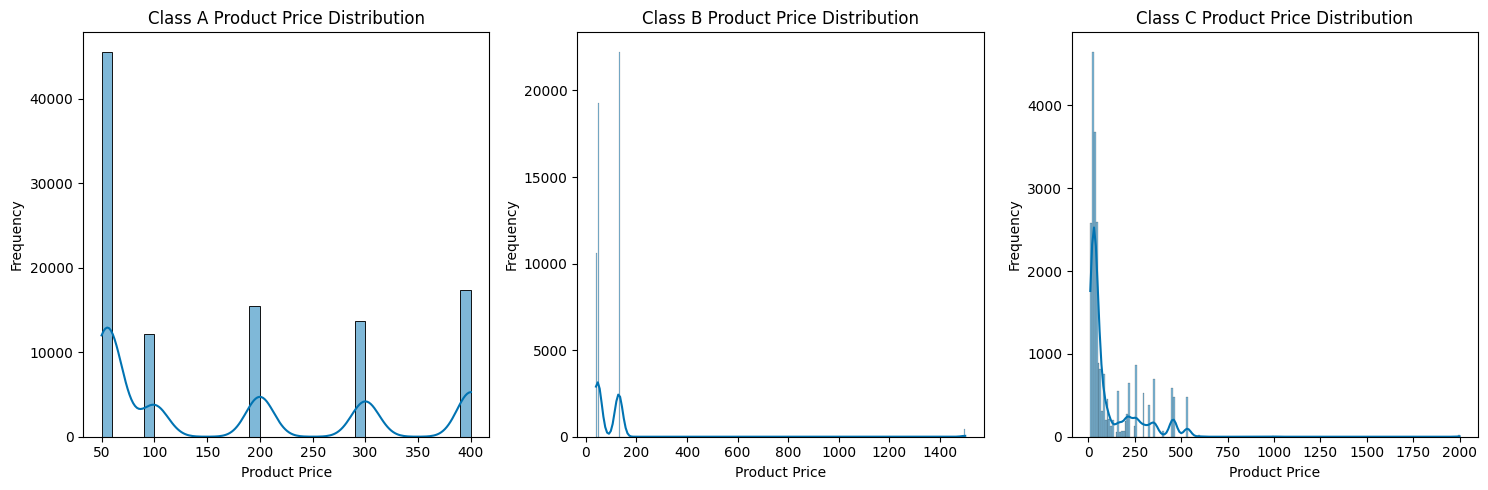

In [76]:
# What are the distribution of Product Price in Class A, B, C
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust the figsize as needed

# Plotting each class distribution on its own subplot
sns.histplot(df_A['product_price'], kde=True, ax=axes[0])  # Class A
axes[0].set_title('Class A Product Price Distribution')
axes[0].set_xlabel('Product Price')
axes[0].set_ylabel('Frequency')

sns.histplot(df_B['product_price'], kde=True, ax=axes[1])  # Class B
axes[1].set_title('Class B Product Price Distribution')
axes[1].set_xlabel('Product Price')
axes[1].set_ylabel('Frequency')

sns.histplot(df_C['product_price'], kde=True, ax=axes[2])  # Class C
axes[2].set_title('Class C Product Price Distribution')
axes[2].set_xlabel('Product Price')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='product_price', ylabel='Count'>

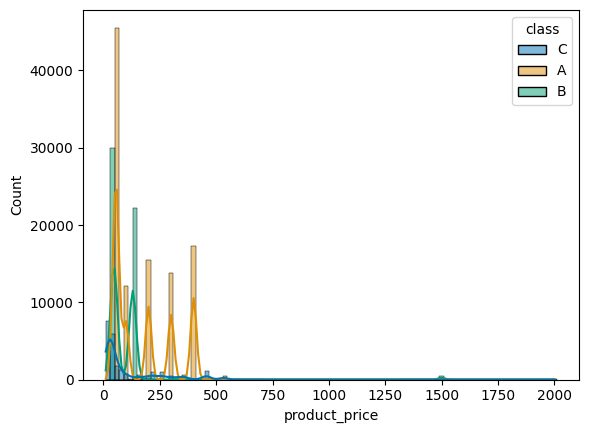

In [77]:
sns.histplot(data=df, x="product_price", binwidth=20, kde=True, hue='class')

# Market Trend Analysis

In [78]:
# Group by 'order_region' and 'category_name_new', summing up the sales for each category within each market
market_category_sales = df.groupby(['order_region', 'category_name_new'])['sales'].sum().reset_index()
market_category_sales.columns = ['Order Region', 'Category Name', 'Total Sales']

# Calculate market-wise total sales
market_sales = df.groupby('order_region')['sales'].sum().reset_index()
market_sales.columns = ['Order Region', 'Total Sales (Market)']

# Merge the two dataframes based on 'Order Region'
merged_data = pd.merge(market_category_sales, market_sales, on='Order Region')

# Calculate the percentage of total sales for each category in each market
merged_data['Sales Percentage'] = (merged_data['Total Sales'] / merged_data['Total Sales (Market)']) * 100

# Display the relationship between sales trends in different markets and product category distribution
merged_data

,Order Region,Category Name,Total Sales,Total Sales (Market),Sales Percentage
0,canada,clothing & apparel,20059.85,186861.04,10.74
1,canada,footwear,42339.57,186861.04,22.66
2,canada,miscellaneous,27598.62,186861.04,14.77
3,canada,outdoor,35212.36,186861.04,18.84
4,canada,sports equipment & accessories,61650.64,186861.04,32.99
...,...,...,...,...,...
128,western europe,electronics & gadgets,652878.41,5894380.77,11.08
129,western europe,footwear,1050763.76,5894380.77,17.83
130,western europe,miscellaneous,1126622.05,5894380.77,19.11
131,western europe,outdoor,894961.22,5894380.77,15.18


# Impact of shipping mode on sales

In [79]:
duplicate_entries = df[df.duplicated(subset=['year', 'shipping_mode'], keep=False)]
# print("Duplicate Entries:")
# print(duplicate_entries)

# Remove duplicates
df_cleaned = df.drop_duplicates(subset=['year', 'shipping_mode', 'sales'])

# Perform the pivot operation on the cleaned DataFrame
sales_by_year_shipping = df_cleaned.groupby(['year', 'shipping_mode'])['sales'].sum().reset_index()
pivot_sales = sales_by_year_shipping.pivot(index='year', columns='shipping_mode', values='sales')
pivot_sales

shipping_mode,first class,same day,second class,standard class
year,,,,
2015,15011.71,13187.25,14999.70,15021.70
2016,14437.79,13968.88,14671.70,15021.70
2017,33527.62,25344.60,32647.68,36232.09
2018,2140.76,1976.38,1976.38,1976.38


In [80]:
print("\nQuarterly Sales:")
sales_by_year_quarter_shipping.pivot_table(index=['year', 'quarter'], columns='shipping_mode', values='sales')



Quarterly Sales:


NameError: name 'sales_by_year_quarter_shipping' is not defined

In [ ]:
print("\nSemi-annually Sales:")
sales_by_year_semi_annual_shipping.pivot_table(index=['year', 'semi_annual'], columns='shipping_mode', values='sales')


Semi-annually Sales:


shipping_mode     first class  same day  second class  standard class
year semi_annual                                                     
2015 1              920838.48 309838.34    1199457.75      3688666.99
     2              986799.49 343910.60    1220093.87      3671225.91
2016 1              923501.53 325687.87    1210640.60      3614545.55
     2              997426.26 336892.53    1173146.25      3721976.73
2017 1              948257.41 319988.55    1176625.03      3801260.14
     2              841484.03 288070.70    1095819.59      3336930.69
2018 1               56062.56  18139.99      69661.71       187785.85

# Product Categorization

In [ ]:
# Calculating cost per order
df['cost_per_order'] = df['order_item_total'] - df['order_profit_per_order']

# Group by year or month (choose relevant time intervals) and calculate average order profit and cost per order
grouped_data = df.groupby('year')[['order_profit_per_order', 'cost_per_order']].mean().reset_index()

# Display the relationship between cost per order and order profit over time as a table
print("Relationship Between Cost Per Order and Order Profit Over Time:")
print("Year\tOrder Profit\tCost Per Order")
for index, row in grouped_data.iterrows():
    print(f"{row['year']}\t{row['order_profit_per_order']}\t{row['cost_per_order']}")


Relationship Between Cost Per Order and Order Profit Over Time:
Year	Order Profit	Cost Per Order
2015.0	21.051187570159602	155.9566903703141
2016.0	20.94514902432053	155.8093955614017
2017.0	24.514721244671083	174.9534720859261
2018.0	15.940598199286859	124.4042209220344


# Analysis 6: Variations in average cost of orders across product classes and regions


In [ ]:
df['cost_per_order'] = df['order_item_total'] - df['order_profit_per_order']

# Grouping by product category ('category_name_new') and calculating the average cost per order
average_cost_per_category = df.groupby('category_name_new')['cost_per_order'].mean().reset_index()

# Analyzing the average cost per order to identify higher expenses and potential cost-saving measures
highest_expense_category = average_cost_per_category[average_cost_per_category['cost_per_order'] == average_cost_per_category['cost_per_order'].max()]
lowest_expense_category = average_cost_per_category[average_cost_per_category['cost_per_order'] == average_cost_per_category['cost_per_order'].min()]

# Displaying the results
print("Average Cost per Order by Product Category:")
average_cost_per_category

Average Cost per Order by Product Category:


,category_name_new,cost_per_order
0,clothing & apparel,117.03
1,electronics & gadgets,311.81
2,footwear,147.53
3,miscellaneous,300.53
4,outdoor,139.65
5,pet supplies,68.55
6,sports equipment & accessories,146.85
7,toys & games,8.67


In [ ]:
print("\nProduct Category Incurring the Highest Expenses:")
highest_expense_category


Product Category Incurring the Highest Expenses:


,category_name_new,cost_per_order
1,electronics & gadgets,311.81


In [ ]:
print("\nProduct Category with the Lowest Expenses:")
lowest_expense_category


Product Category with the Lowest Expenses:


,category_name_new,cost_per_order
7,toys & games,8.67


e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



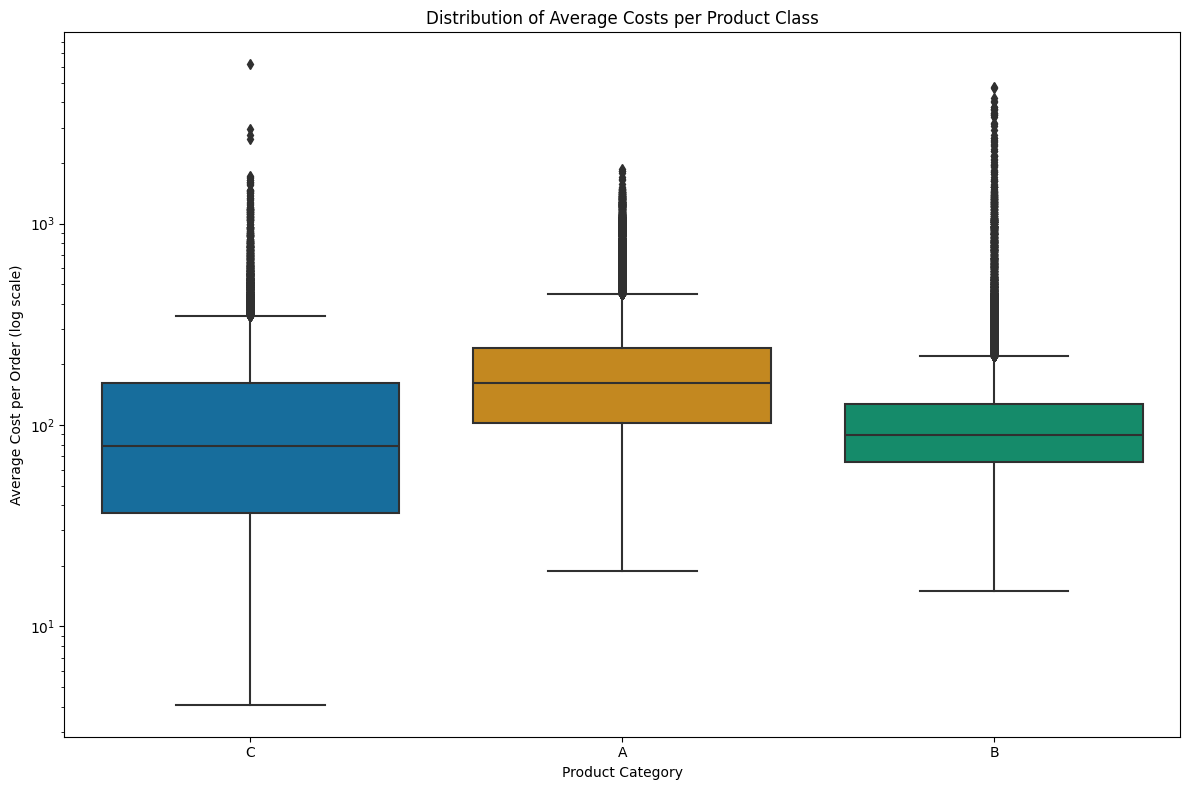

In [ ]:
# Calculate the average cost per order for each product category
df['cost_per_order'] = df['order_item_total'] - df['order_profit_per_order']

# Grouping by product category ('category_name_new') and calculating the average cost per order
average_cost_per_category = df.groupby('class')['cost_per_order'].mean().reset_index()

# Creating a boxplot to display the distribution of average costs per product category
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='class', y='cost_per_order')
plt.yscale('log')  # Set y-axis to log scale
plt.title('Distribution of Average Costs per Product Class')
plt.xlabel('Product Category')
plt.ylabel('Average Cost per Order (log scale)')
plt.tight_layout()

# Show the plot
plt.show()


Average Cost per Order Across Different Geographical Regions:
       order_region  cost_per_order
0            canada          150.53
1         caribbean          157.47
2    central africa          154.72
3   central america          157.99
4      central asia          153.54
5       east africa          159.23
6       east of usa          155.56
7      eastern asia          163.04
8    eastern europe          157.29
9      north africa          157.07
10  northern europe          174.21
11          oceania          158.51
12    south america          155.68
13       south asia          159.31
14    south of  usa          152.98
15   southeast asia          160.10
16  southern africa          149.94
17  southern europe          170.36
18        us center          153.39
19      west africa          155.34
20        west asia          155.98
21      west of usa          156.05
22   western europe          172.29


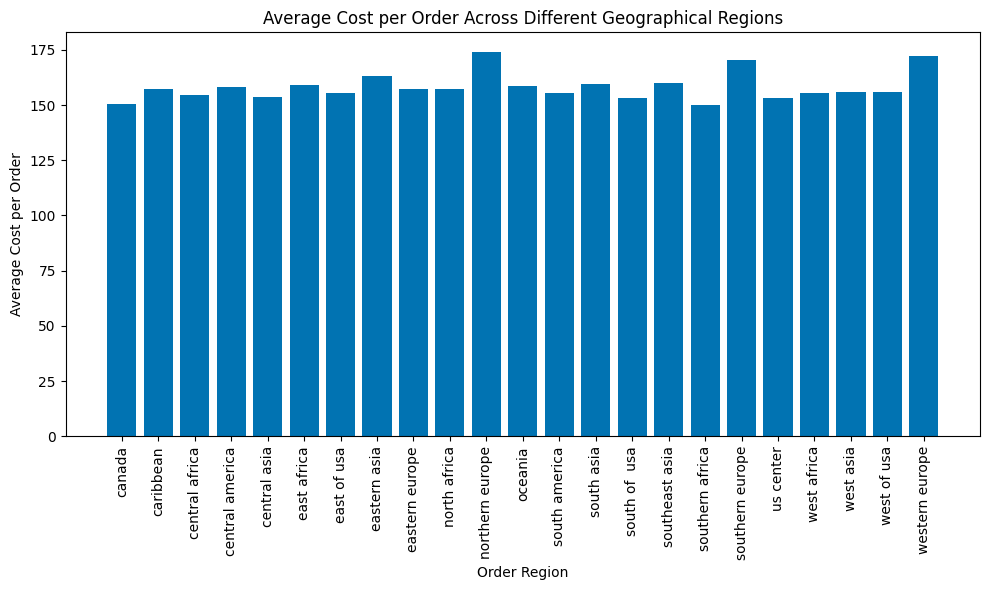

In [ ]:
# Calculate the average cost per order for each geographical region
df['cost_per_order'] = df['order_item_total'] - df['order_profit_per_order']

# Grouping by 'order_region' and calculating the average cost per order
average_cost_per_region = df.groupby('order_region')['cost_per_order'].mean().reset_index()

# Displaying the results
print("Average Cost per Order Across Different Geographical Regions:")
print(average_cost_per_region)

# Plotting the average cost per order across different regions
plt.figure(figsize=(10, 6))
plt.bar(average_cost_per_region['order_region'], average_cost_per_region['cost_per_order'])
plt.title('Average Cost per Order Across Different Geographical Regions')
plt.xlabel('Order Region')
plt.ylabel('Average Cost per Order')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
average_cost_per_order = average_cost_per_region['cost_per_order'].mean()
print("Average Cost per Order across all Regions:", average_cost_per_order)


Average Cost per Order across all Regions: 158.28609765057968


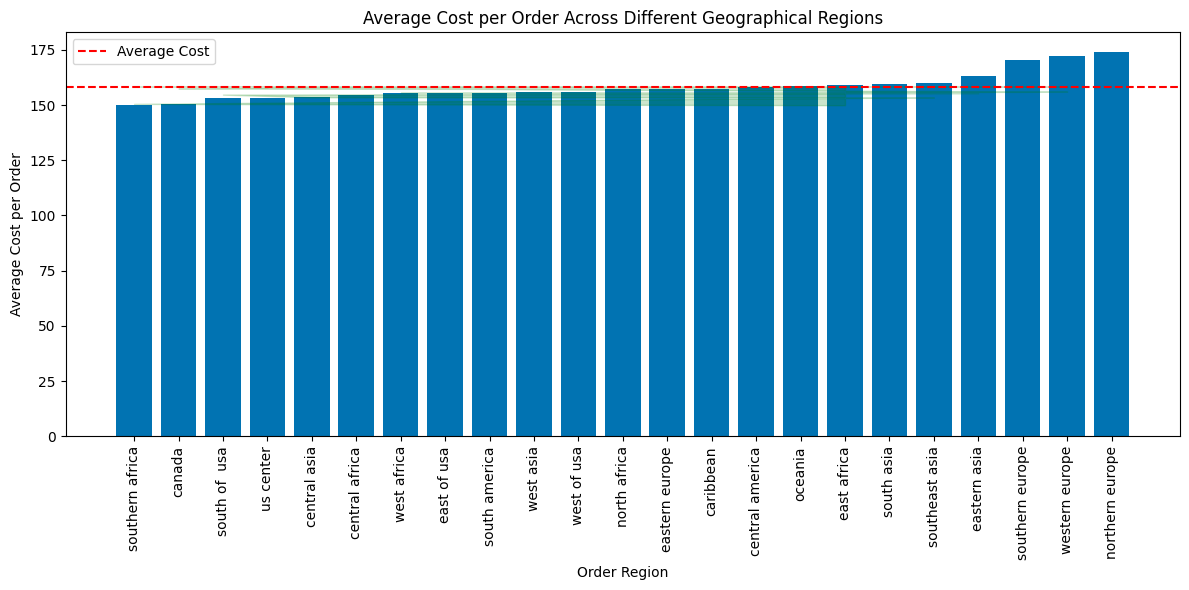

In [ ]:
# Calculate the average cost per order for each geographical region
df['cost_per_order'] = df['order_item_total'] - df['order_profit_per_order']

# Grouping by 'order_region' and calculating the average cost per order
average_cost_per_region = df.groupby('order_region')['cost_per_order'].mean().reset_index()

# Sorting regions by average cost per order in ascending order
sorted_regions = average_cost_per_region.sort_values(by='cost_per_order')

# Plotting the average cost per order across different regions
plt.figure(figsize=(12, 6))
plt.bar(sorted_regions['order_region'], sorted_regions['cost_per_order'])
plt.axhline(y=sorted_regions['cost_per_order'].mean(), color='red', linestyle='--', label='Average Cost')
plt.title('Average Cost per Order Across Different Geographical Regions')
plt.xlabel('Order Region')
plt.ylabel('Average Cost per Order')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Highlighting regions below the mean cost
plt.fill_between(sorted_regions.index, sorted_regions['cost_per_order'], sorted_regions['cost_per_order'].mean(), where=(sorted_regions['cost_per_order'] < sorted_regions['cost_per_order'].mean()), color='green', alpha=0.2, label='Regions below Average Cost')

# Show the plot
plt.show()


In [ ]:
# Combine 'order_year', 'order_month', and 'order_day' columns to create 'order_date' in M/D/Y format
df['order_date'] = pd.to_datetime(df[['order_month', 'order_day', 'order_year']].astype(str).agg('/'.join, axis=1))
df.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name_new,customer_city,...,order_day,shipping_year,shipping_month,shipping_day,price_bin,class,Quarter,Year,cost_per_order,order_date
0,debit,3,4,91.25,314.64,advance shipping,0,73,electronics & gadgets,caguas,...,31,2018,2,3,Very_High,C,2018Q1,2018,223.39,2018-01-31
1,transfer,5,4,-249.09,311.36,late delivery,1,73,electronics & gadgets,caguas,...,13,2018,1,18,Very_High,C,2018Q1,2018,560.45,2018-01-13
2,cash,4,4,-247.78,309.72,shipping on time,0,73,electronics & gadgets,san jose,...,13,2018,1,17,Very_High,C,2018Q1,2018,557.50,2018-01-13
3,debit,3,4,22.86,304.81,advance shipping,0,73,electronics & gadgets,los angeles,...,13,2018,1,16,Very_High,C,2018Q1,2018,281.95,2018-01-13
4,payment,2,4,134.21,298.25,advance shipping,0,73,electronics & gadgets,caguas,...,13,2018,1,15,Very_High,C,2018Q1,2018,164.04,2018-01-13


# RFM Analysis

In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Calculate Recency, Frequency, and Monetary Value
# Assuming you have a dataset containing information about customers and transactions
# Calculate the Recency, Frequency, and Monetary Value for each customer

# Assume the analysis date is the date where dataset end
# last_transaction_date = df['order_date'].max() # ->> use it later

# Calculate Recency - how recently a customer made a purchase
# Find the most recent transaction date for each customer
recency = df.groupby('order_customer_id')['order_date'].max().reset_index()
# recency['Recency'] = (last_transaction_date - recency['order_date']).dt.days
recency['Recency'] = (pd.to_datetime('today') - recency['order_date']).dt.days
recency = recency[['order_customer_id', 'Recency']]

# Calculate Frequency - how often a customer makes a purchase
# Count the number of orders for each customer
frequency = df.groupby('order_customer_id').size().reset_index(name='Frequency')

# Calculate Monetary Value - how much money a customer has spent
# Calculate the sum of monetary values for each customer
monetary = df.groupby('order_customer_id')['sales'].sum().reset_index()
monetary.columns = ['order_customer_id', 'Monetary']

# Merge the three metrics together
rfm_data = pd.merge(recency, frequency, on='order_customer_id')
rfm_data = pd.merge(rfm_data, monetary, on='order_customer_id')

# Display RFM dataset
rfm_data.head()


,order_customer_id,Recency,Frequency,Monetary
0,1,2907,1,499.95
1,2,2251,10,1819.73
2,3,2344,18,3537.68
3,4,2495,14,1719.63
4,5,2572,7,1274.75


In [ ]:
rfm_data.head()

,order_customer_id,Recency,Frequency,Monetary
0,1,2907,1,499.95
1,2,2251,10,1819.73
2,3,2344,18,3537.68
3,4,2495,14,1719.63
4,5,2572,7,1274.75


e:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



         Recency  Frequency  Monetary
Cluster                              
0        2194.67       1.83    441.07
1        2352.86      18.51   3724.99
2        2639.71       8.70   1690.81


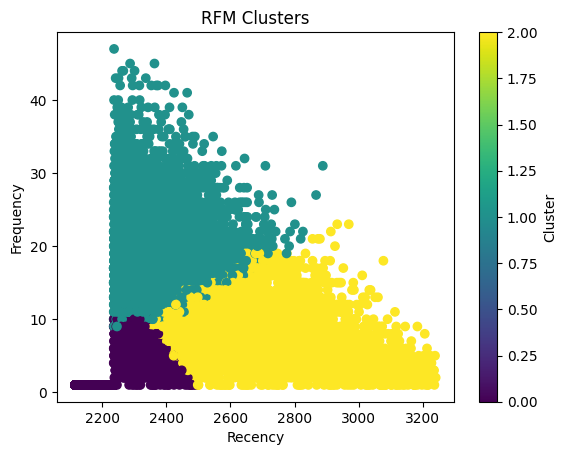

In [ ]:
# Group by customer and calculate RFM metrics
rfm_data = rfm_data.rename(columns={'order_customer_id': 'CustomerID'})  # Renaming column for consistency
rfm_data.set_index('CustomerID', inplace=True)  # Set 'order_customer_id' as index

# Normalize RFM values
scaler = StandardScaler()
rfm_data_scaled = scaler.fit_transform(rfm_data)  # Fit and transform scaled data

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Choose the number of clusters as needed
rfm_data['Cluster'] = kmeans.fit_predict(rfm_data_scaled)  # Predict clusters based on scaled data

# Analyze customer segments and business insights
# Analyze RFM clusters
rfm_cluster_analysis = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

# Descriptive statistics for each cluster
print(rfm_cluster_analysis)

# Visualize the distribution of RFM clusters
plt.scatter(rfm_data['Recency'], rfm_data['Frequency'], c=rfm_data['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Clusters')
plt.colorbar(label='Cluster')
plt.show()


# Create targeted strategies
# Analyze each cluster and assign labels for targeted strategies
# For example, Cluster 0: "Loyal Customers", Cluster 1: "Potential Churn", etc.

# Implement strategies for each segment
# Tailor marketing, promotions, or customer service approaches based on the characteristics of each segment

# Evaluate and iterate
# Track the effectiveness of strategies implemented and refine them as needed

# Business Insights
# Summarize key findings, such as the number of customers in each segment, changes observed after strategies, etc.


In [ ]:
# Assigning labels to each cluster
def assign_cluster_labels(cluster):
    if cluster == 0:
        return "Loyal Customers"
    elif cluster == 1:
        return "Potential Churn"
    else:
        return "Regular Customers"

rfm_data['Cluster_Label'] = rfm_data['Cluster'].apply(assign_cluster_labels)

# Analyze each cluster's statistics
cluster_stats = rfm_data.groupby('Cluster_Label').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max']
})
cluster_stats


Recency             Frequency         Monetary          \
                     mean   min   max      mean min max     mean     min   
Cluster_Label                                                              
Loyal Customers   2194.67  2115  2491      1.83   1  13   441.07   11.29   
Potential Churn   2352.86  2236  2888     18.51   8  47  3724.99 1579.74   
Regular Customers 2639.71  2348  3240      8.70   1  23  1690.81   25.00   

                            
                       max  
Cluster_Label               
Loyal Customers    2509.62  
Potential Churn   10524.17  
Regular Customers  4734.44

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



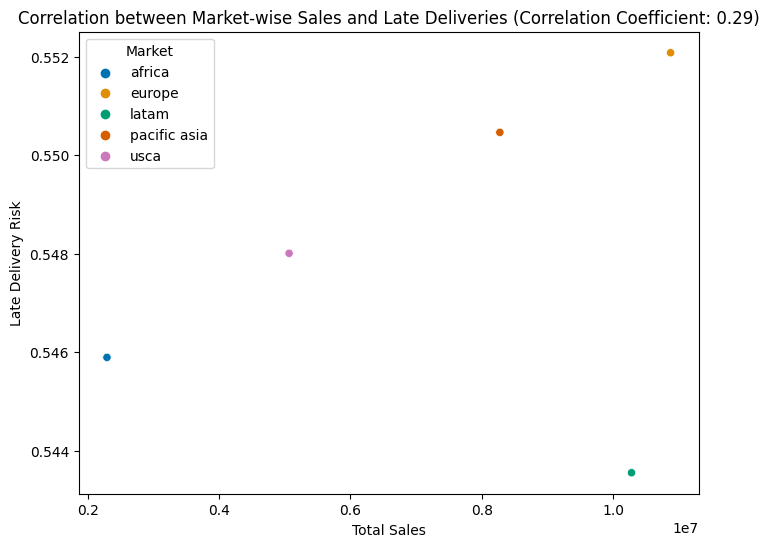

In [ ]:

# Step 1: Prepare the Data
market_wise_data = df.groupby('market').agg({
    'sales': 'sum',
    'late_delivery_risk': 'mean'  # Assuming 'late_delivery_risk' is a categorical variable (0 or 1)
}).reset_index()

# Step 2: Calculate the Correlation
correlation = market_wise_data['sales'].corr(market_wise_data['late_delivery_risk'])

# Step 3: Visualize the Correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=market_wise_data, x='sales', y='late_delivery_risk', hue='market')
plt.title(f'Correlation between Market-wise Sales and Late Deliveries (Correlation Coefficient: {correlation:.2f})')
plt.xlabel('Total Sales')
plt.ylabel('Late Delivery Risk')
plt.legend(title='Market')
plt.show()


e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



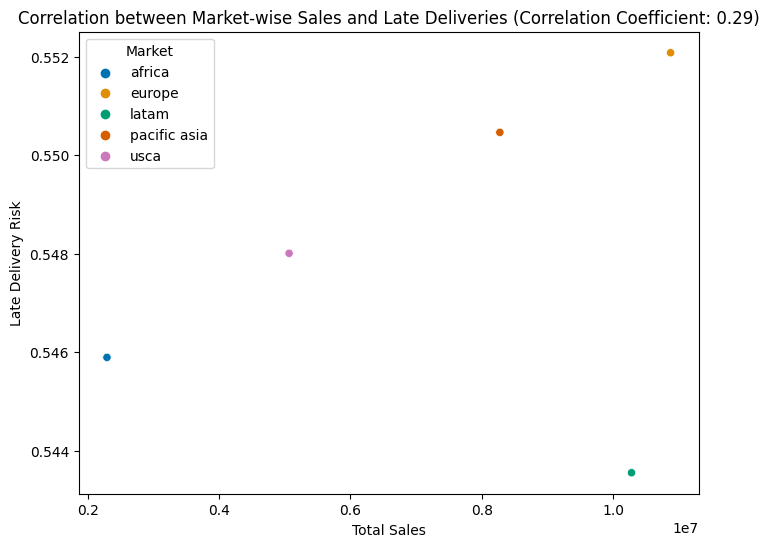

,market,sales,late_delivery_risk
0,africa,2294452.93,0.55
1,europe,10872396.80,0.55
2,latam,10277612.84,0.54
3,pacific asia,8273743.74,0.55
4,usca,5066528.71,0.55


In [ ]:
# Step 1: Prepare the Data
market_wise_data = df.groupby('market').agg({
    'sales': 'sum',
    'late_delivery_risk': 'mean'  # Assuming 'late_delivery_risk' is a categorical variable (0 or 1)
}).reset_index()

# Step 2: Calculate the Correlation
correlation = market_wise_data['sales'].corr(market_wise_data['late_delivery_risk'])

# Step 3: Visualize the Correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=market_wise_data, x='sales', y='late_delivery_risk', hue='market')
plt.title(f'Correlation between Market-wise Sales and Late Deliveries (Correlation Coefficient: {correlation:.2f})')
plt.xlabel('Total Sales')
plt.ylabel('Late Delivery Risk')
plt.legend(title='Market')
plt.show()

# Create a table with the market-wise data and correlation
# market_wise_data['Correlation'] = correlation
market_wise_data


e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



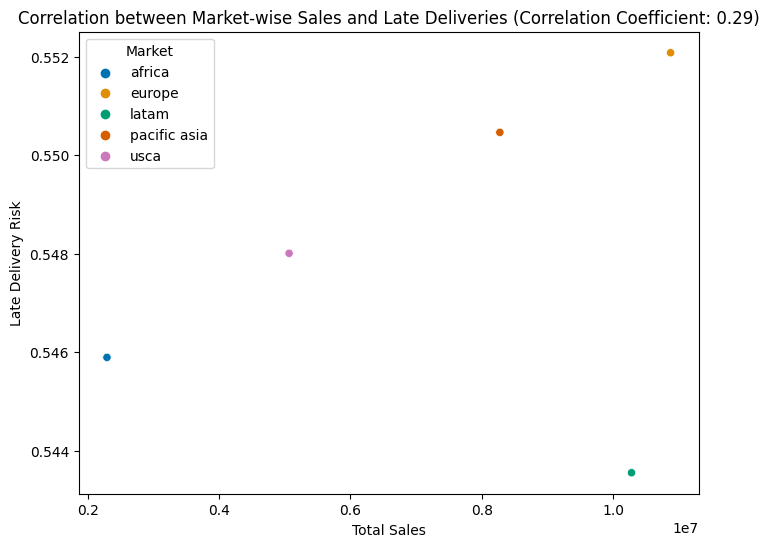

         market       sales  late_delivery_risk  Correlation
0        africa  2294452.93                0.55         0.29
1        europe 10872396.80                0.55         0.29
2         latam 10277612.84                0.54         0.29
3  pacific asia  8273743.74                0.55         0.29
4          usca  5066528.71                0.55         0.29


In [ ]:
# Step 1: Prepare the Data
market_wise_data = df.groupby('market').agg({
    'sales': 'sum',
    'late_delivery_risk': 'mean'  # Assuming 'late_delivery_risk' is a categorical variable (0 or 1)
}).reset_index()

# Step 2: Calculate the Correlation
correlation = market_wise_data['sales'].corr(market_wise_data['late_delivery_risk'])

# Step 3: Visualize the Correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=market_wise_data, x='sales', y='late_delivery_risk', hue='market')
plt.title(f'Correlation between Market-wise Sales and Late Deliveries (Correlation Coefficient: {correlation:.2f})')
plt.xlabel('Total Sales')
plt.ylabel('Late Delivery Risk')
plt.legend(title='Market')
plt.show()

# Create a table showing market-wise data and correlation
market_wise_data['Correlation'] = correlation  # Add the correlation value to the entire column

# Display the table
print(market_wise_data)
